# Airline Passenger Satisfaction Prediction
---
#### **Author**: Michael Holthouser

![Header](images/title_pic.jpeg)

## Business Understanding
---
- **Explorer Airlines** has tasked me to provide prediction analysis on their passenger's satisfaction levels, and to provide insight on what key features have the greatest influence customer satisfaction. The competition is strong in the airline industry. By identifying these important features and working to improve on them, will give Explorer Airlines a competative edge, and as a result improve customer satisfaction.




### Evaluation Metric : F1-Score
- For my prediction models, I have chose to focus my attention to the f1-score in my classification reports. The f1-score combines both precision and recall metrics into a single score. My goal was to reduce the number of false positives and false negatives while optimizing the number of true negatives. With that being said recall precision were both taken into account. Since recall and precision were close in rating for my models, it made sense to use the f1-score. 

## Models
- For this project I used 5 different classification models:
1. **Logistic Regression** - I used logistic regression as my baseline model. After spliting the data into train and test sets, I checked for imbalance. The result was that the data was fairly balanced, but I tested the accuracy of the model with SMOTE and without to see if there was a major difference. After testing the model both ways, the outcome was very close, so opted to not introduce SMOTE into the modeling process. Logistic Regression was my worst performing model, and did not score as high as the other models.
    - Roc auc score = 90%
    - F1-score = 91%
2. **Decision Tree** - I performed two different decision tree models: decision tree with no tuning, and a decision tree using GridSearchCV. Decision trees require a lot of tuning to become accurate, that is why after my first model with no tuning showed signs of overfitting. After performing a gridsearch on my second model, I ran the model again but with more hyperparameters to try to improve accuracy and reduce overfitting. Compared to the logistic regression model, the decision tree with gridsearch performed much better at predicting false negatives, false positives, and false negatives. 
    - Roc auc score = 95%
    - F1-score = 96%
3. **Random Forest** - Like the decision tree, I ran two different random forest models. One with no tuning, and other other using GridSearchCV. The model without tuning, like the decision tree, showed signs of overfitting. After adding gridsearh to the model, the evaluation metrics were excellent. However, since random forest doesn't perform quite as well with balanced data, the results of the confusion matrix wasn't ideal. It did not do well at predicting false negatives, false positives, and false negatives. 
    - Roc auc score = 94%
    - F1-score = 97%
4. **XGBoost** - XGBoost is another high performance machine learning model that performed very well with the data. Although, the scores were very similar to the catboost model and could have easily been chosen as the best model. Like catboost, I ran two xgboost models. One with no tuning and one using random search. It performed well at reducing the number of false positives and false negatives, as well as predicting true negatives. 
    - Roc auc = 96%
    - F1-score = 97%
5. <mark>**CatBoost**</mark> (best model) - Catboost performed very well on the data. Catboost was designed to work well with categorical data and has built-in functionality for performing cross validation, which helps prevent overfitting. I ran a model with no tuning, and then a second catboost model using RandomSearchCV. Random search is similar to gridsearch, in the sense it picks the hyperparameters to help the performance of the model. However, it does not do a exhaustive search making it less computationally expensive. But since the model generally performs well without tuning, the two models both performed very well. 
    - Roc auc score = 96%
    - F1-score = 97%

## Relevant Packages and Libraries 

In [889]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import catboost as ctb
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

## Data Understanding
---
- The data was downloaded from [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction). The dataset is comprised of 103,904 airline passenger surveys about their travel experience. The dataset was comprised mostly of categorical data, and the target variable was 'satisfaction'. Satisfaction was divided up into two options making this a binary classification problem. Passengers were classified as either being 'satisfied' or 'neutral/dissatisfied'.

In [890]:
#import the data
data = pd.read_csv("data/train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Column Descriptions:
---
- **Gender**: Gender of the passengers (Female, Male)

- **Customer Type**: The customer type (Loyal customer, disloyal customer)

- **Age**: The actual age of the passengers

- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- **Flight distance**: The flight distance of this journey

- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

- **Ease of Online booking**: Satisfaction level of online booking

- **Gate location**: Satisfaction level of Gate location

- **Food and drink**: Satisfaction level of Food and drink

- **Online boarding**: Satisfaction level of online boarding

- **Seat comfort**: Satisfaction level of Seat comfort

- **Inflight entertainment**: Satisfaction level of inflight entertainment

- **On-board service**: Satisfaction level of On-board service

- **Leg room service**: Satisfaction level of Leg room service

- **Baggage handling**: Satisfaction level of baggage handling

- **Check-in service**: Satisfaction level of Check-in service

- **Inflight service**: Satisfaction level of inflight service

- **Cleanliness**: Satisfaction level of Cleanliness

- **Departure Delay in Minutes**: Minutes delayed when departure

- **Arrival Delay in Minutes**: Minutes delayed when Arrival

- <mark>**Satisfaction**</mark>: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)

# Data Cleaning
---
- Drop unnecessary columns: Unnamed, id
- Format columns to use conventional python coding. Words should be lower-case and use snake case. 
- Remove rows with NaN values.
- Rename elements in 'Customer Type' for easier comprehension.
- Rename certain columns for easier comprehension. 
- The survey rows that contain satisfaction scores of 0 will be removed. 
    - The customer most likely did not indicate the score for that particular category. 
- Columns, Departure Delay in Minutes and Arrival Delay in Minutes will be combined into a column called Total Delay. 
- Our target variable will be changed from an object data type to a numerical data type. 

### Drop Columns: Unnamed, id

- Unnamed and id are not necessary for our analysis. Therefore, I will remove them from the dataset. 

In [891]:
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


### Rename Columns

- Next I will rename the columns to follow the conventional python developer format. 
    - lowercase and snake case.  

In [892]:
# Function to convert strings to snake case 
def snake_case(string):
    return string.lower().replace(' ', '_')

#rename columsn to lower case using snake case
for column in data.columns:
    data = data.rename(columns={column: snake_case(column)})

In [893]:
#Call info() method to check columns names, dtypes, and number of records 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure/arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

### Descriptive Statistics

In [894]:
data.describe()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Check For Missing Values

In [895]:
data.isna().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

- It appears that we have **310** NaN values from the arrival_delay_in_minutes column. 
- 310 is not enough missing values to effect my analysis of the data. 
- The next step I will delete the 310 records with missing data. 

In [896]:
missing_arrival_delay = data[data['arrival_delay_in_minutes'].isna()]
missing_arrival_delay.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


#### Drop Records With Missing Data

In [897]:
data.dropna(axis=0, inplace=True)

In [898]:
print(data.columns)

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')


In [899]:
# Check to see if missing data records have been removed. 
data.isna().sum()

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

#### Rename 'customer_type' Elements

In [900]:
data['customer_type'] = data['customer_type'].map({'Loyal Customer':'Returning Customer', 
                                                   'disloyal Customer':'First-time Customer'})

#### Rename column names

In [901]:
data = data.rename(columns={'leg_room_service':'leg_room', 
                            'departure/arrival_time_convenient':'departure/arrival_time_convenience'})

In [902]:
# Check to see if changes have been made to the dataframe
data

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,First-time Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Returning Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,First-time Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,First-time Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


#### Remove rows where the customers did not indicate a satisfaction score
- Scores for these columns should be between 1-5, not 0. 

In [903]:
data = data[(data['inflight_wifi_service']!=0) & (data['departure/arrival_time_convenience']!=0) & 
           (data['ease_of_online_booking']!=0) & (data['gate_location']!=0) & (data['food_and_drink']!=0) &
           (data['online_boarding']!=0) & (data['seat_comfort']!=0) & (data['inflight_entertainment']!=0) &
           (data['on-board_service']!=0) & (data['leg_room']!=0) & (data['checkin_service']!=0) & 
           (data['inflight_service']!=0) & (data['cleanliness']!=0)]

#### Map target variable, satisfaction column, to contain 0 and 1
- Currently the satisfaction column is made up of two elements of the object data type.  I am going to map them to 0 and 1 for modeling purposes. 
- **neutral or dissatisfied = 0**
- **satisfied = 1**

In [904]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

#### Combine columns (departure_delay_in_minutes and arrival_delay_in_minutes) to make total_delay_in_minutes
- The column departure_delay_in_minutes is set as an int data type where as the arrival_delay_in_minutes is in float data type. 
- Before combining the two columns together, I will first change the data type of departure_delay_in_minutes to a float data type. 

In [905]:
data['departure_delay_in_minutes'] = data['departure_delay_in_minutes'].astype('float')

In [906]:
data['total_delay_in_minutes'] = data['departure_delay_in_minutes'] + data['arrival_delay_in_minutes']

#### Drop columns 'departure_delay_in_minutes' and 'arrival_delay_in_minutes'
- Since I created a new column combining the two columns, leaving them in my dataframe is not necessary. 

In [907]:
data = data.drop(['departure_delay_in_minutes', 'arrival_delay_in_minutes'], axis=1)

In [908]:
# Check dataframe for changes 
data

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,total_delay_in_minutes
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,First-time Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0,3.0
103900,Male,Returning Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1,0.0
103901,Male,First-time Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0,21.0
103902,Female,First-time Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


## EDA: Exploratory Data Analysis

- I will first explore the categorical columns, to check their values. 
- Then I will label encode them to convert them to a numerical data type for modeling. 
- For the visualizations, I have included some of the features that I thought were important with the addition to some of the important features from my final model.

### Show The Unique Values of Each Column

In [909]:
for col in data.columns:
    print(f'Column: {col}')
    
    print(data[col].unique())

Column: gender
['Male' 'Female']
Column: customer_type
['Returning Customer' 'First-time Customer']
Column: age
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 57 49 36 22 31 15
 35 67 37 40 34 39 50 29 54 21 28 27 69 60 23 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 18 55 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Column: type_of_travel
['Personal Travel' 'Business travel']
Column: class
['Eco Plus' 'Business' 'Eco']
Column: flight_distance
[ 460  235 1142 ...  974 1479  400]
Column: inflight_wifi_service
[3 2 4 1 5]
Column: departure/arrival_time_convenience
[4 2 5 3 1]
Column: ease_of_online_booking
[3 2 5 4 1]
Column: gate_location
[1 3 2 5 4]
Column: food_and_drink
[5 1 2 4 3]
Column: online_boarding
[3 5 2 1 4]
Column: seat_comfort
[5 1 2 3 4]
Column: inflight_entertainment
[5 1 2 3 4]
Column: on-board_service
[4 1 2 3 5]
Column: leg_room
[3 5 4 2 1]
Column: baggage_handling
[4 3 5 1 2]
Column: checkin_service
[4 1 3 5 2]
Column: inflight_service
[5 4 3 1

### Satisfaction

- The image below shows the distribution of surveys completed with being labeled as satisfied or dissatisfied. 
- It appears more people were willing to complete the survey because they were dissatisfied with their travel experience. 
- [count/percentages ref](https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars)

In [910]:
print("Satisfaction Counts")
print(data['satisfaction'].value_counts())
print()
print("Percentages")
print(data["satisfaction"].value_counts(normalize=True))

Satisfaction Counts
0    54777
1    40638
Name: satisfaction, dtype: int64

Percentages
0    0.574092
1    0.425908
Name: satisfaction, dtype: float64


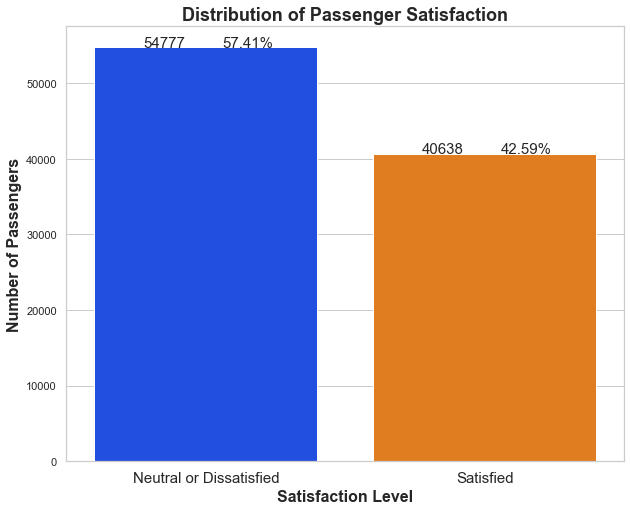

In [911]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='satisfaction', data=data, palette='bright')
plt.title('Distribution of Passenger Satisfaction', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction Level', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize='15')

# Add count and percentage labels next to each bar
total = float(len(data['satisfaction']))
for i, count in enumerate(data['satisfaction'].value_counts()):
    percentage = '{:.2f}%'.format((count/total) * 100)
    ax.text(i-0.15, count+50, str(count), ha='center', fontsize='15')
    ax.text(i+0.15, count+50, percentage, ha='center', fontsize='15')
    
plt.savefig('images/satisfaction.png', format='png')

plt.show()





- **Check for imbalance**: With the the data being split 57:43 between dissatisfied and satisfied, there is no need for any special resampling techniques to balance the data. 

### Gender

In [912]:
gender_group = data.groupby(['satisfaction', 'gender'])['gender'].count()
gender_group

satisfaction  gender
0             Female    28050
              Male      26727
1             Female    20291
              Male      20347
Name: gender, dtype: int64

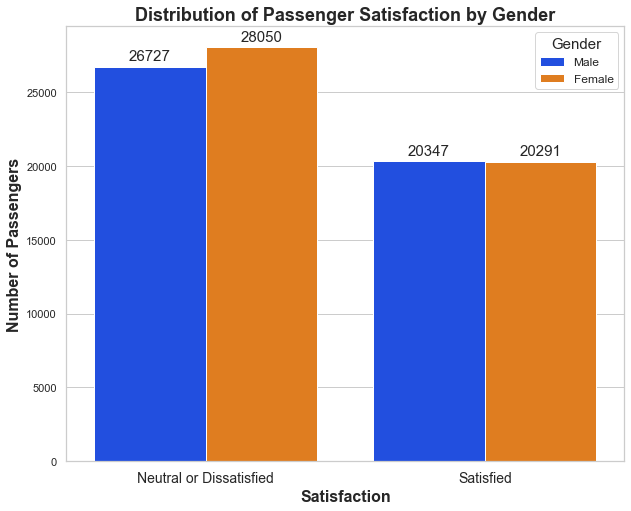

In [913]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='gender', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Gender', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Male', 'Female'], fontsize='12', title='Gender', title_fontsize='15')

plt.savefig('images/gender.png', format='png')

plt.show();

#### Observations:
- There were more female passengers that were dissatisfied than males. 
- The passengers that were satisfied were very close between genders, but with a slight edge in favor of males. 

### Type of Travel
- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- For business passengers have different needs and expectations than passengers traveling for pleasure. They pay more money for their tickets in return for a more comfortable flight experience. 
- Personal travel usually means that the price of travel comes out of the pocket of the person traveling. However, due to the more affordable price of traveling for these particular passengers, the flight experience will not be nearly as comfortable as those traveling for business.   

In [914]:
type_group = data.groupby(['satisfaction', 'type_of_travel'])['type_of_travel'].count()
type_group

satisfaction  type_of_travel 
0             Business travel    27765
              Personal Travel    27012
1             Business travel    38161
              Personal Travel     2477
Name: type_of_travel, dtype: int64

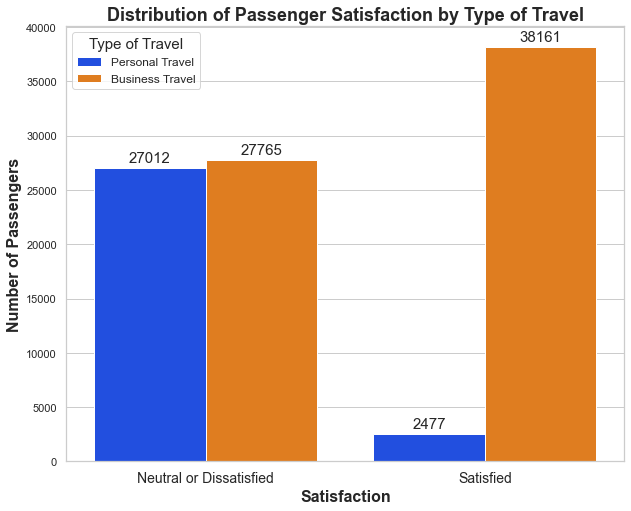

In [915]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='type_of_travel', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Type of Travel', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Personal Travel', 'Business Travel'], fontsize='12', title='Type of Travel', title_fontsize='15')

plt.savefig('images/type_of_travel.png', format='png')

plt.show();


#### Observations: 
- Looking at this graph in the perspective of airline executives, I would be happy to see the number of satisfied business travelers. 
- However, I would be taken back by the number of business travelers who were rated as neutral/dissatisfied. That number should be addressed by the company immediately. 

### Class
- It is clear that amongst the completed surveys of satisfied passengers, the majority come from the business class. 
- The clear majority of neutral or dissatisfied passengers were flying in the eco class. 

In [916]:
class_group = data.groupby(['satisfaction', 'class'])['class'].count()
class_group

satisfaction  class   
0             Business    14599
              Eco         34831
              Eco Plus     5347
1             Business    31736
              Eco          7272
              Eco Plus     1630
Name: class, dtype: int64

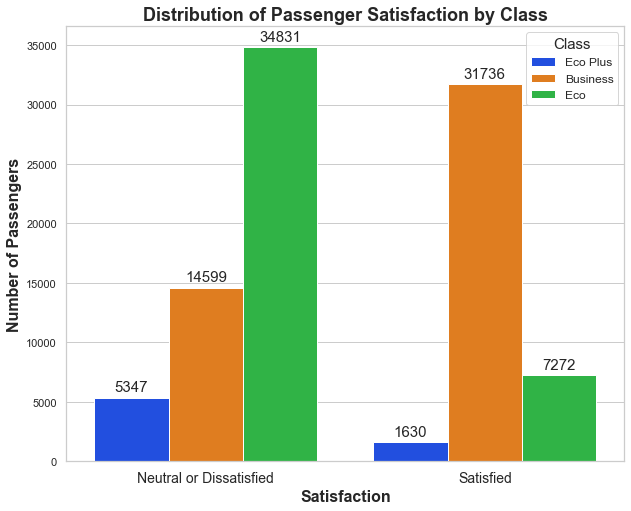

In [917]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='class', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Class', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Eco Plus', 'Business', 'Eco'], fontsize='12', title='Class', title_fontsize='15')

plt.savefig('images/class.png', format='png')

plt.show();

### Customer Type
- Returning customers are important for the company. Especially those who fly business class, because the business class tickets are the money makers for an airline. 

In [918]:
cust_type_group = data.groupby(['satisfaction', 'customer_type'])['customer_type'].count()
cust_type_group

satisfaction  customer_type      
0             First-time Customer    12584
              Returning Customer     42193
1             First-time Customer     2758
              Returning Customer     37880
Name: customer_type, dtype: int64

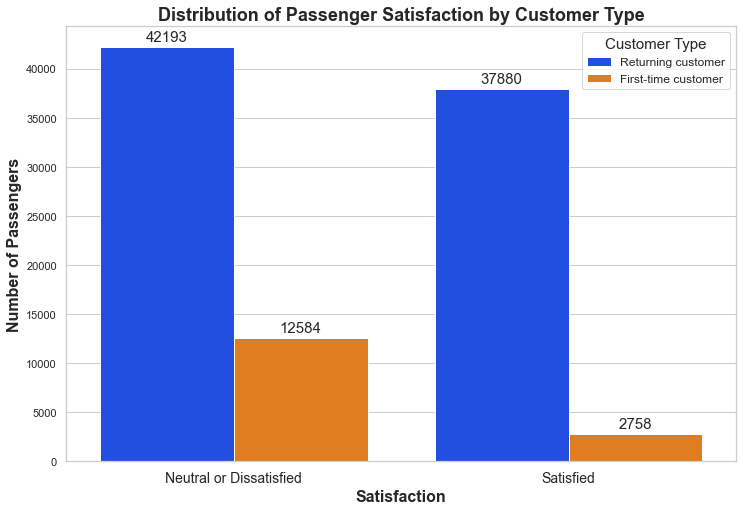

In [919]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))

ax = sns.countplot(x='satisfaction', hue='customer_type', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Customer Type', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')


# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Returning customer', 'First-time customer'], fontsize='12', title='Customer Type', title_fontsize='15')

plt.savefig('images/customer_type.png', format='png')

plt.show();

#### Observations:
- There were significantly more returning customers in this dataset compared to first-time customers.
- It is good to see that the majority of returning customers were satisfied, but also alarming that there were more returning customers that were classified as unsatisfied. 

### Seat Comfort

In [920]:
seat_comfort_group = data.groupby(['satisfaction', 'seat_comfort'])['seat_comfort'].count()
seat_comfort_group

satisfaction  seat_comfort
0             1                8664
              2               10798
              3               13875
              4               13016
              5                8424
1             1                2094
              2                2686
              3                3296
              4               16561
              5               16001
Name: seat_comfort, dtype: int64

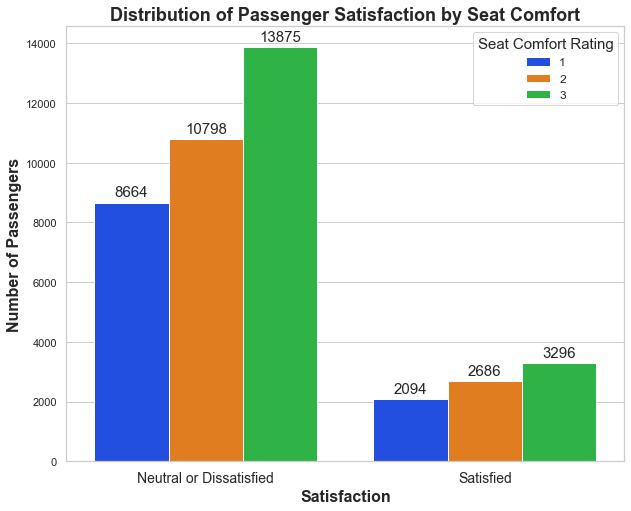

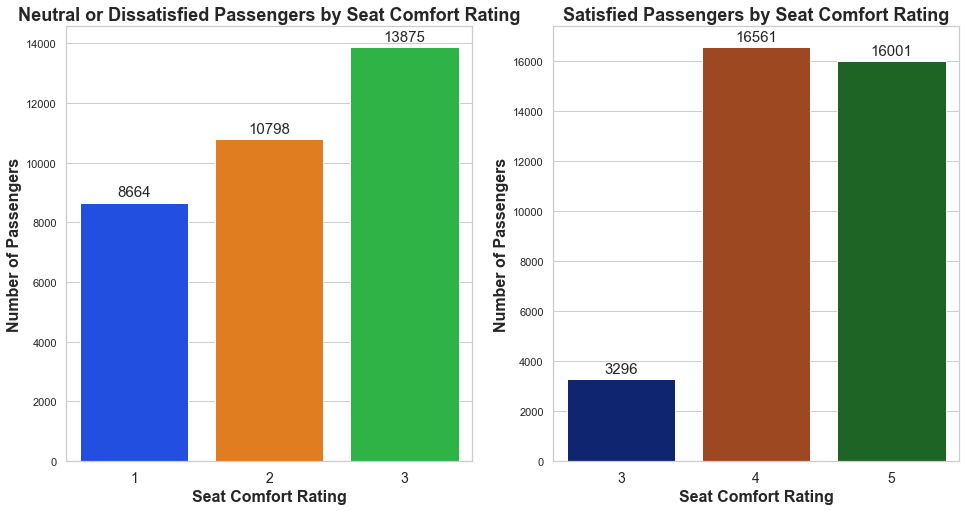

In [921]:
# Create countplot
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='seat_comfort', data=data, palette='bright', hue_order=[1, 2, 3])

plt.title('Distribution of Passenger Satisfaction by Seat Comfort', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['1', '2', '3'], fontsize='12', title='Seat Comfort Rating', title_fontsize='15')

plt.savefig('images/seat_comfort.png', format='png')

# Create two separate data frames for not satisfied and satisfied groups
not_satisfied = data.loc[data['satisfaction'] == 0]
satisfied = data.loc[data['satisfaction'] == 1]

# Create countplots for each group separately
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


sns.set_style('whitegrid')

# Plot countplot for not satisfied group
sns.countplot(x='seat_comfort', data=not_satisfied, palette='bright', hue_order=[1, 2, 3, 4, 5], order=[1, 2, 3], ax=axes[0])
axes[0].set_title('Neutral or Dissatisfied Passengers by Seat Comfort Rating', fontweight='bold', fontsize='18')
axes[0].set_xlabel('Seat Comfort Rating', fontweight='bold', fontsize='16')
axes[0].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[0].set_xticklabels(['1', '2', '3'], fontsize=14)

# Add count values to the top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Plot countplot for satisfied group
sns.countplot(x='seat_comfort', data=satisfied, palette='dark', hue_order=[1, 2, 3, 4, 5], order=[3, 4, 5], ax=axes[1])
axes[1].set_title('Satisfied Passengers by Seat Comfort Rating', fontweight='bold', fontsize='18')
axes[1].set_xlabel('Seat Comfort Rating', fontweight='bold', fontsize='16')
axes[1].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[1].set_xticklabels(['3', '4', '5'], fontsize=14)

# Add count values to the top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')


plt.savefig('images/seat_comfort_2.png', format='png')



plt.show()

#### Observations:
- It is evident, that passengers that were satisfied were consistently rating their seat comfort as a 4 or 5. 
- Oppositely, passengers that were neutral/dissatisfied had a rating of 1-3.

### Inflight Service

In [922]:
inflight_service_group = data.groupby(['satisfaction', 'inflight_service'])['inflight_service'].count()
inflight_service_group

satisfaction  inflight_service
0             1                    4616
              2                    7554
              3                   14714
              4                   18427
              5                    9466
1             1                    1623
              2                    2905
              3                    4218
              4                   16705
              5                   15187
Name: inflight_service, dtype: int64

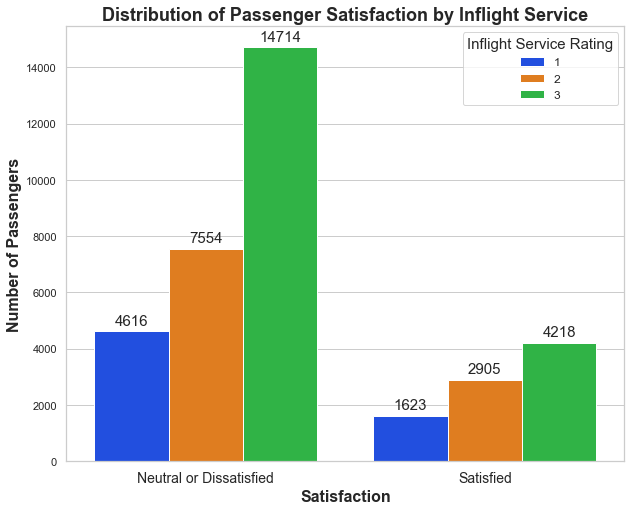

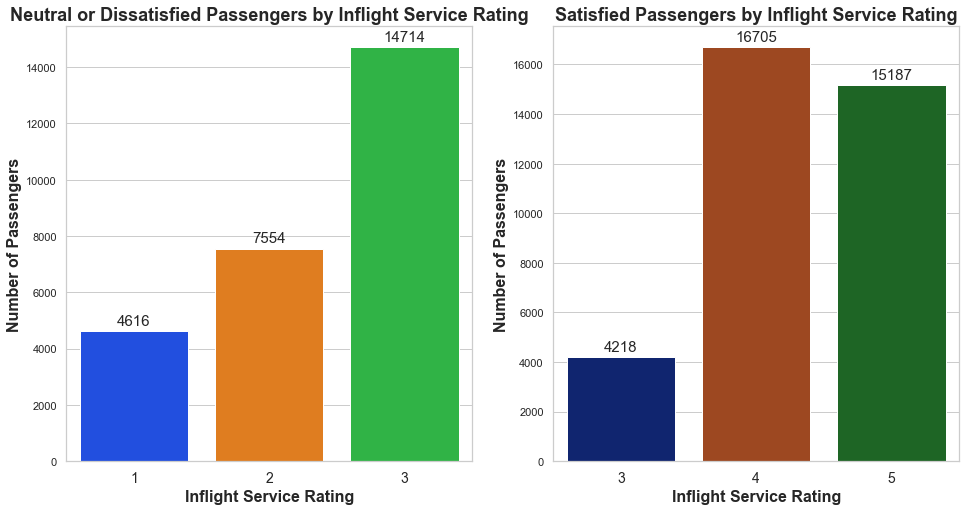

In [923]:
# Create countplot
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='inflight_service', data=data, palette='bright', hue_order=[1, 2, 3])

plt.title('Distribution of Passenger Satisfaction by Inflight Service', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['1', '2', '3'], fontsize='12', title='Inflight Service Rating', title_fontsize='15')

plt.savefig('images/inflight_service.png', format='png')

# Create two separate data frames for not satisfied and satisfied groups
not_satisfied = data.loc[data['satisfaction'] == 0]
satisfied = data.loc[data['satisfaction'] == 1]

# Create countplots for each group separately
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


sns.set_style('whitegrid')

# Plot countplot for not satisfied group
sns.countplot(x='inflight_service', data=not_satisfied, palette='bright', hue_order=[1, 2, 3, 4, 5], order=[1, 2, 3], ax=axes[0])
axes[0].set_title('Neutral or Dissatisfied Passengers by Inflight Service Rating', fontweight='bold', fontsize='18')
axes[0].set_xlabel('Inflight Service Rating', fontweight='bold', fontsize='16')
axes[0].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[0].set_xticklabels(['1', '2', '3'], fontsize=14)

# Add count values to the top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Plot countplot for satisfied group
sns.countplot(x='inflight_service', data=satisfied, palette='dark', hue_order=[1, 2, 3, 4, 5], order=[3, 4, 5], ax=axes[1])
axes[1].set_title('Satisfied Passengers by Inflight Service Rating', fontweight='bold', fontsize='18')
axes[1].set_xlabel('Inflight Service Rating', fontweight='bold', fontsize='16')
axes[1].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[1].set_xticklabels(['3', '4', '5'], fontsize=14)

# Add count values to the top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')


plt.savefig('images/inflight_service_2.png', format='png')

plt.show()

#### Observations:
- It is evident that great inflight services well result in satisfied customers. 
- Oppositely, if the inflight services are getting rated 1-3, it highly increases the chances that the passengers are going to be dissatisfied. 

### Baggage Handling

In [924]:
baggage_group = data.groupby(['satisfaction', 'baggage_handling'])['baggage_handling'].count()
baggage_group

satisfaction  baggage_handling
0             1                    4681
              2                    7646
              3                   15019
              4                   18049
              5                    9382
1             1                    1676
              2                    2868
              3                    4224
              4                   16608
              5                   15262
Name: baggage_handling, dtype: int64

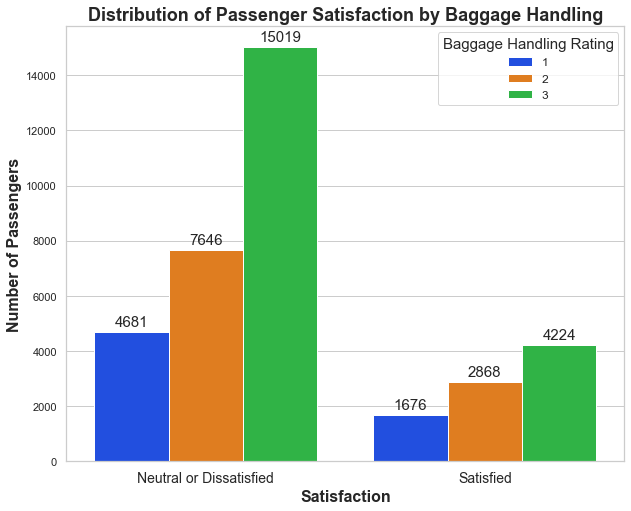

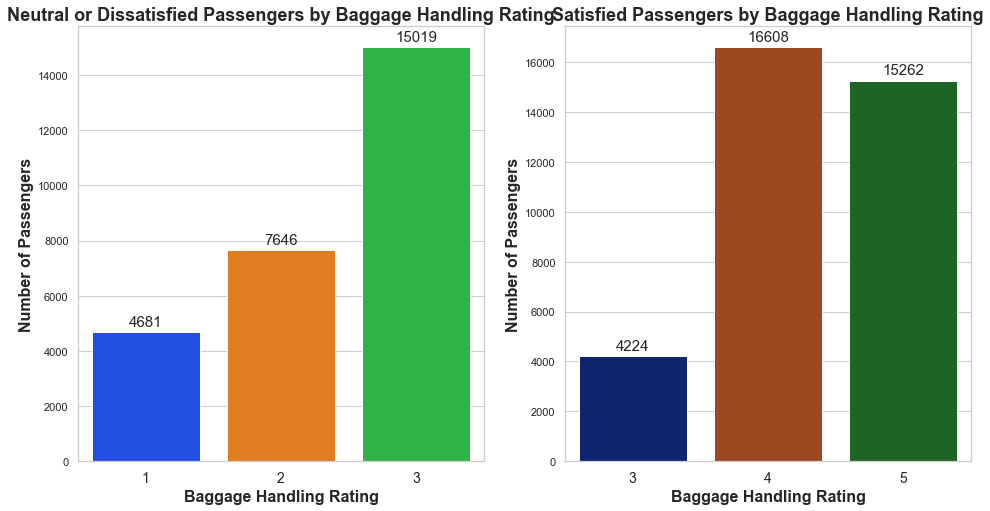

In [925]:
# Create countplot
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='baggage_handling', data=data, palette='bright', hue_order=[1, 2, 3])

plt.title('Distribution of Passenger Satisfaction by Baggage Handling', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['1', '2', '3'], fontsize='12', title='Baggage Handling Rating', title_fontsize='15')

plt.savefig('images/baggage.png', format='png')

# Create two separate data frames for not satisfied and satisfied groups
not_satisfied = data.loc[data['satisfaction'] == 0]
satisfied = data.loc[data['satisfaction'] == 1]

# Create countplots for each group separately
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


sns.set_style('whitegrid')

# Plot countplot for not satisfied group
sns.countplot(x='baggage_handling', data=not_satisfied, palette='bright', hue_order=[1, 2, 3, 4, 5], order=[1, 2, 3], ax=axes[0])
axes[0].set_title('Neutral or Dissatisfied Passengers by Baggage Handling Rating', fontweight='bold', fontsize='18')
axes[0].set_xlabel('Baggage Handling Rating', fontweight='bold', fontsize='16')
axes[0].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[0].set_xticklabels(['1', '2', '3'], fontsize=14)

# Add count values to the top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Plot countplot for satisfied group
sns.countplot(x='baggage_handling', data=satisfied, palette='dark', hue_order=[1, 2, 3, 4, 5], order=[3, 4, 5], ax=axes[1])
axes[1].set_title('Satisfied Passengers by Baggage Handling Rating', fontweight='bold', fontsize='18')
axes[1].set_xlabel('Baggage Handling Rating', fontweight='bold', fontsize='16')
axes[1].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[1].set_xticklabels(['3', '4', '5'], fontsize=14)

# Add count values to the top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')


plt.savefig('images/baggage_2.png', format='png')

plt.show()

#### Observations:
- Passengers who rated baggage handling rating between 1-3 are much more likely to to be neutral or dissatisfied. 
- On the contrary, passengers with ratings of 4-5 are highly likely to be satisfied. 

## Feature Selection
- Feature selection is an important process for several reasons:
    - Improves model performance. 
        - You want to remove irrelevant features. 
    - Reduces overfitting. 
        - Too many features can lead to overfitting.
    - Reducing computational time and storage requirements. 
    - Improving interpretability. 
        - Using fewer features can make the model easier to understand. 

In [926]:
data.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,total_delay_in_minutes
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0


### One-Hot Encoding
- First step is to one-hot encode the categorical variables in my dataset. 
- The new variable called data_clean is the new dataframe with the one-hot encoded variables. Once the the new dummy variables were created, the original variables were dropped from the dataset. 

#### Correlation Matrix and Heatmap
- This is the next step of feature selection.
- When reading a heat map and correlation matrix, you want to look at each coordinate and select the largest numbers. 
    - The closer the number is to 1, the higher the correlation, making it a strong feature to select for you modeling. 
- The heat map is a more visually appeasing version of a correlation matrix. The lighter the color is, the weaker the relationship is. 
- In this case I visually detect 5 variables that have weak relationships with our target variable, 'satisfaction'.
    - **age**
    - **departure/arrival_time_convenience**
    - **gate_location**
    - **total_delay_in_minutes**

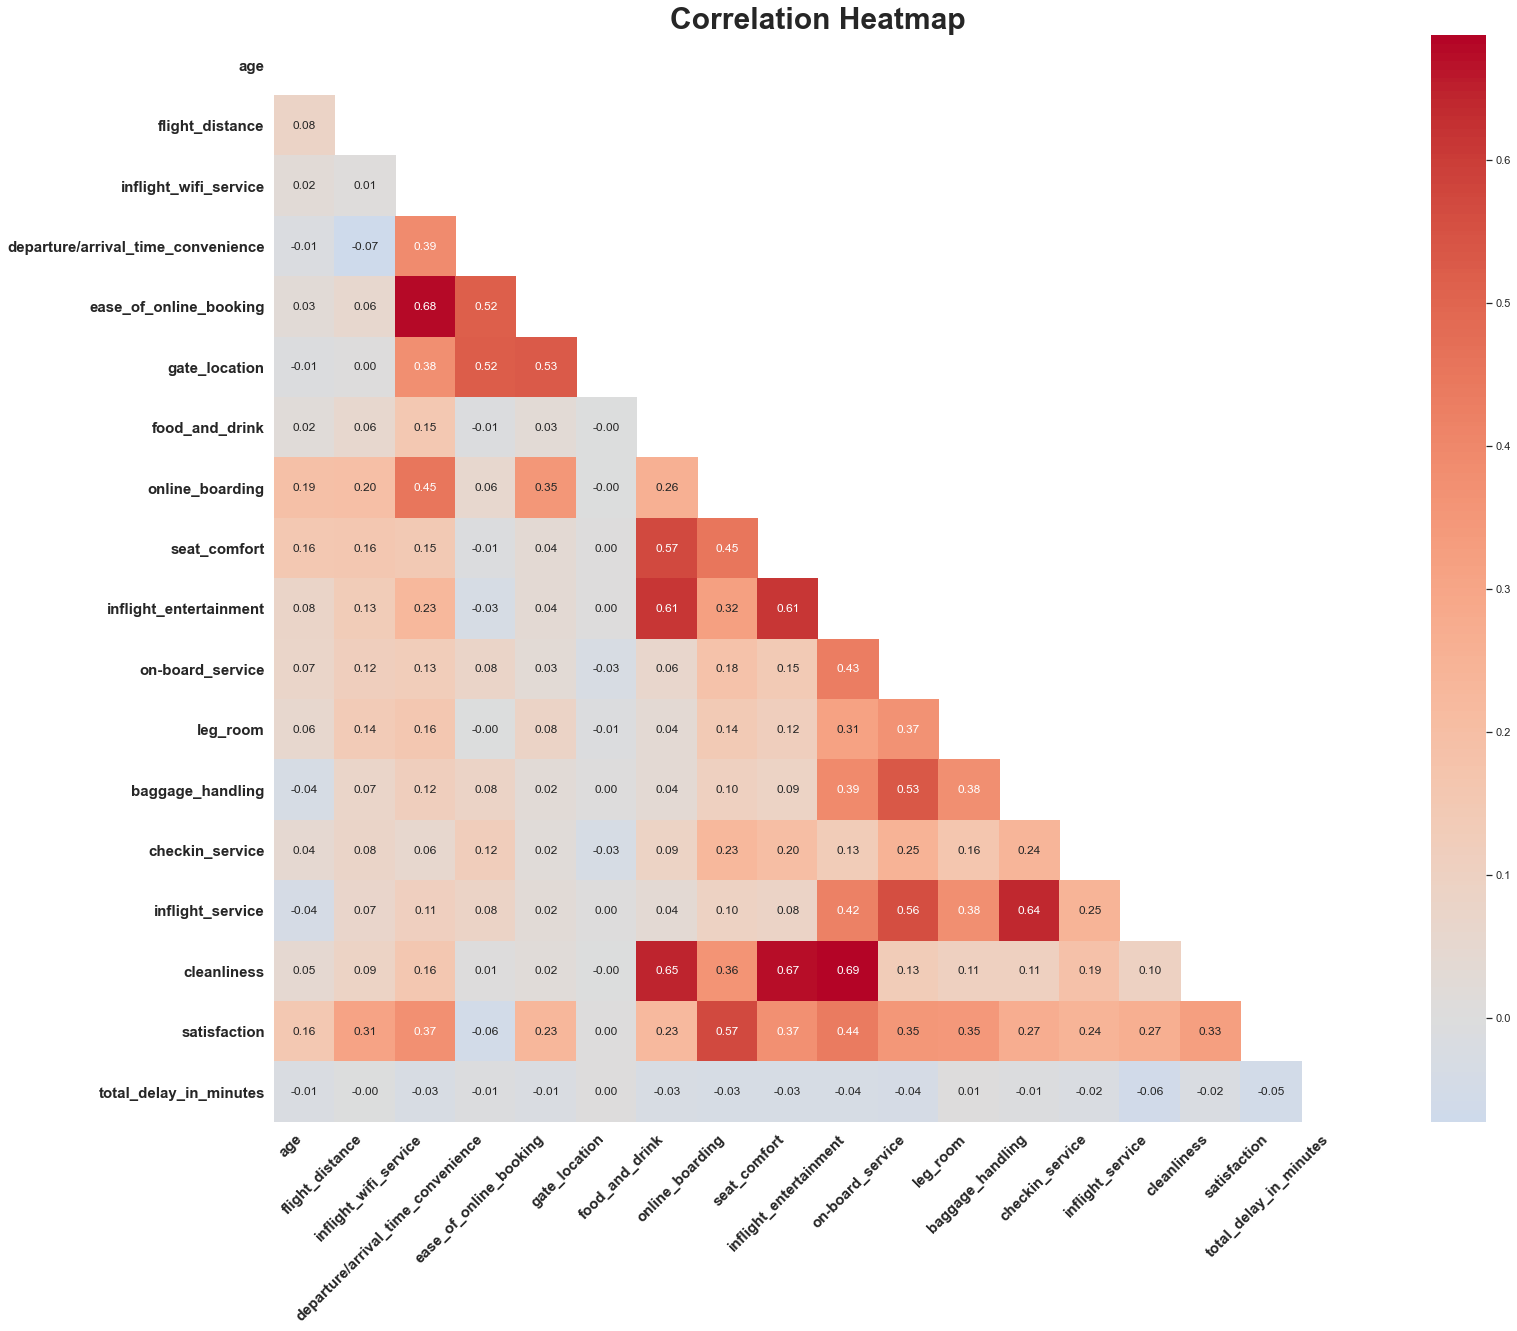

In [927]:
# Create heat map
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(25,20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize='15', fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize='15', fontweight='bold')
plt.title('Correlation Heatmap', fontweight='bold', fontsize = '30')

plt.show()

In [928]:
# correlation matrix as satisfaction as the target
satisfaction_corr = data.corr()['satisfaction'].map(abs).sort_values(ascending=False)
satisfaction_corr

satisfaction                          1.000000
online_boarding                       0.569430
inflight_entertainment                0.438129
seat_comfort                          0.374924
inflight_wifi_service                 0.374004
on-board_service                      0.349038
leg_room                              0.345042
cleanliness                           0.327679
flight_distance                       0.307627
baggage_handling                      0.272755
inflight_service                      0.268044
checkin_service                       0.242945
ease_of_online_booking                0.230243
food_and_drink                        0.226694
age                                   0.155291
departure/arrival_time_convenience    0.056881
total_delay_in_minutes                0.054974
gate_location                         0.004567
Name: satisfaction, dtype: float64

- Just to confirm with the heatmap, this list of variables confirms that in fact age, departure/arrival_time_convenience, total_delay_in_minutes, and gate_location have the weakest relationships to our target variable satisfaction. 
- The next step will be to remove these variables from the dataset before we begin modeling.  

#### Drop weak correlated variables

In [929]:
data.drop(['age', 'departure/arrival_time_convenience', 'total_delay_in_minutes', 
                              'gate_location'], axis=1, inplace=True)

In [930]:
# Check if columns have been removed from the final dataframe
print(data.columns)

Index(['gender', 'customer_type', 'type_of_travel', 'class', 'flight_distance',
       'inflight_wifi_service', 'ease_of_online_booking', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on-board_service', 'leg_room', 'baggage_handling', 'checkin_service',
       'inflight_service', 'cleanliness', 'satisfaction'],
      dtype='object')


## Prepare Data for Modeling
- Create X and Y variables.
    - X = independent variables.
    - y = dependent variable.
- Split the data in 80/20 train/test. 

#### Create X and y variables

In [931]:
# Create X
X = data.drop('satisfaction', axis=1)

# Create y
y = data['satisfaction']

#### Perform train/test split 

In [932]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Baseline Model : Logistic Regression

#### Define Which Columns To Encode 

In [933]:
ordinal_cols = ['inflight_wifi_service',  
                'ease_of_online_booking', 
                'food_and_drink', 
                'online_boarding', 
                'seat_comfort', 
                'inflight_entertainment', 
                'on-board_service', 
                'leg_room', 
                'baggage_handling', 
                'checkin_service',
                'inflight_service',
                'cleanliness']

categorical_cols = ['gender', 'customer_type', 'type_of_travel', 'class']

numerical_cols = ['flight_distance']

#### Logistic Regression Pipeline

In [934]:
# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Create the pipeline for Logistic Regression
pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

#Generate predictions for the training and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Print the classification reports for the training and test data
print('Classification report for logistic regression training data:')
print(classification_report(y_train, y_train_pred, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the test data
conf_mat = confusion_matrix(y_train, y_train_pred)
print('Confusion matrix for training data:')
print(conf_mat)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('==============================================================')

print('Classification report for logistic regression test data:')
print(classification_report(y_test, y_test_pred, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the test data
conf_mat = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix for test data:')
print(conf_mat)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)

Classification report for logistic regression training data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.91      0.91     40987
              satisfied       0.88      0.87      0.88     30574

               accuracy                           0.90     71561
              macro avg       0.89      0.89      0.89     71561
           weighted avg       0.90      0.90      0.90     71561

Confusion matrix for training data:
[[37448  3539]
 [ 3924 26650]]
AUC: 0.8926556022261638


Classification report for logistic regression test data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.91      0.91     13790
              satisfied       0.88      0.87      0.87     10064

               accuracy                           0.89     23854
              macro avg       0.89      0.89      0.89     23854
           weighted avg       0.89      0.89      0.89     23854

Con

#### Results on Training Data
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.91, which means that 91% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.91, which means that 91% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.91 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.90.

#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 91%, which means that out of all the customers predicted as neutral or dissatisfied, 91% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 91%, which means that out of all the actual neutral or dissatisfied customers, 91% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 91%.
- **Accuracy**: Overall accuracy of 89%, which means that 89% of the predictions made by the model on the test set were correct.

#### Confusion Matrix For Test Data

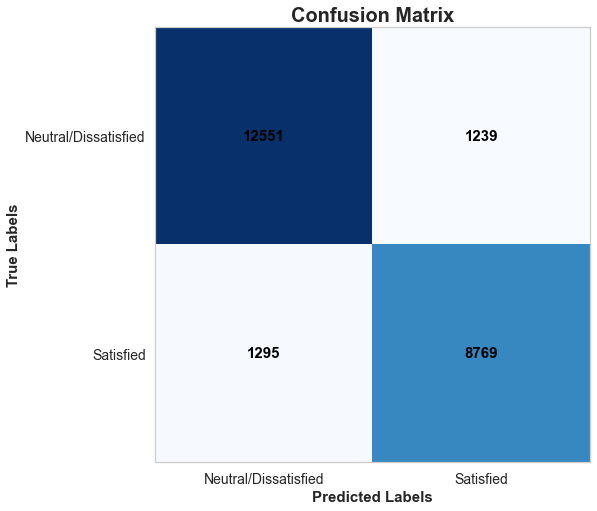

In [935]:
# get confusion matrix
cm_lg = confusion_matrix(y_test, y_test_pred)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_lg, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Confusion Matrix', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lg[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

#### Confusion Matrix Results:
- The confusion matrix shows that out of 13,790 neutral or dissatisfied customers in the test set, 12,551 were correctly predicted as neutral or dissatisfied (True Negative), while 1,239 were incorrectly predicted as satisfied (False Positive).
- Similarly, out of 10,064 satisfied customers in the test set, 8,769 were correctly predicted as satisfied (True Positive), while 1,295 were incorrectly predicted as neutral or dissatisfied (False Negative).

#### Check for Imbalance
- The data is pretty well balanced. There is no need to try SMOTE to deal with any issues with imbalanced data. 

In [936]:
# check for imbalance of the training data
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

0    40987
1    30574
Name: satisfaction, dtype: int64


0    13790
1    10064
Name: satisfaction, dtype: int64


### Logistic Regression Results:
- Because I am mostly concerned with incorrectly classifying the neutral or dissatisfied passengers as satisfied, I am focusing on the recall score of my models. Retaining customers is very important for the airline industry, especially the passengers that are willing to pay more for business class. 

- This model perfomed slightly better at identifying neutral or dissatisfied customers compared to satisfied customers. 

    - **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>88%</mark> 
    - **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>91%</mark> 
    - **<mark>AUC Score</mark>**: <mark>89%</mark>

### Model 2: Decision Tree (No Tuning)
- The first decision tree model will be a "vanilla" one, with no tuning.  
- The second decision tree model will be run with GridSearchCV to find the best hyperparameters.
    - Decision Trees require a lot of pruning to be accurate. GridSearchCV is an excellent means of searching for the best hyperparameters to get the most accurate model. 

In [937]:
# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Create the decision tree pipeline
dt_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
dt_pipeline.fit(X_train, y_train)

# Generate predictions for the training and test data
y_train_pred_dt = dt_pipeline.predict(X_train)
y_test_pred_dt = dt_pipeline.predict(X_test)

# Print the classification reports for the training and test data
print('Classification report for decision tree w/out tuning training data:')
print(classification_report(y_train, y_train_pred_dt, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the test data
conf_mat_dt = confusion_matrix(y_train, y_train_pred_dt)
print('Confusion matrix for test data:')
print(conf_mat_dt)

# Check the AUC of predictions
false_positive_rate_dt, true_positive_rate_dt, thresholds_dt = roc_curve(y_train, y_train_pred_dt)
roc_auc_dt = auc(false_positive_rate_dt, true_positive_rate_dt)
print('AUC:', roc_auc_dt)
print('\n')
print('=====================================================================')

print('Classification report for decision tree w/out tuning test data:')
print(classification_report(y_test, y_test_pred_dt, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the test data
conf_mat_dt = confusion_matrix(y_test, y_test_pred_dt)
print('Confusion matrix for test data:')
print(conf_mat_dt)

# Check the AUC of predictions
false_positive_rate_dt, true_positive_rate_dt, thresholds_dt = roc_curve(y_test, y_test_pred_dt)
roc_auc_dt = auc(false_positive_rate_dt, true_positive_rate_dt)
print('AUC:', roc_auc_dt)

Classification report for decision tree w/out tuning training data:
                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      1.00      1.00     40987
              satisfied       1.00      1.00      1.00     30574

               accuracy                           1.00     71561
              macro avg       1.00      1.00      1.00     71561
           weighted avg       1.00      1.00      1.00     71561

Confusion matrix for test data:
[[40987     0]
 [    1 30573]]
AUC: 0.9999836462353634


Classification report for decision tree w/out tuning test data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     13790
              satisfied       0.93      0.94      0.93     10064

               accuracy                           0.94     23854
              macro avg       0.94      0.94      0.94     23854
           weighted avg       0.94      0.94      0.94     

#### Classification Report on Training Data
- With perfect numbers on our training data, it is apparent that there is some overfitting involved on the training data. 
- Like mentioned previously, decision trees require a lot of pruning, which is why we will run the model with GridSearchCV next 

#### Classification Report on Test Data
- Scores on our test data aren't bad. However, we do have some overfitting on our data.

#### Confusion Matrix On Test Data

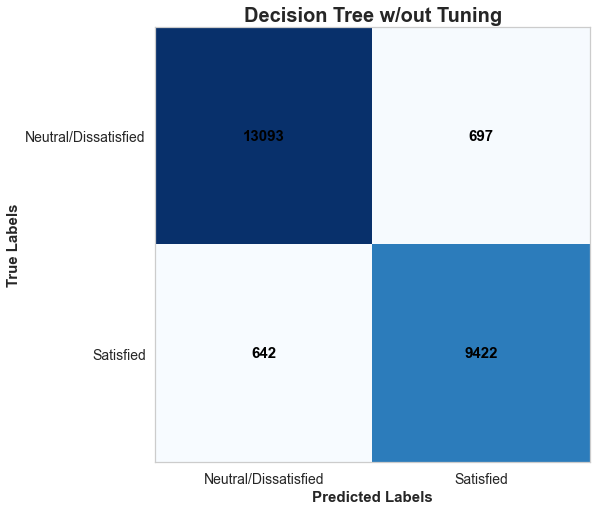

In [938]:
# get confusion matrix
cm_v = confusion_matrix(y_test, y_test_pred_dt)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_v, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Decision Tree w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_v[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

### Decision Tree With No Tuning Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>93%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>94%</mark>

### Decision Tree with GridSearchCV

In [939]:
# Define the hyperparameters for tuning the model
params = {'clf__max_depth': [2, 3, 5, 7, 9, 13, 20],
          'clf__min_samples_split': [2, 5, 10, 12, 15, 20, 25, 30, 35, 50],
          'clf__min_samples_leaf': [1, 2, 4]}

# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Create the decision tree pipeline
dt_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

# Create a grid search object 
dt_gs = GridSearchCV(dt_pipeline, params, cv=5)

# Fit the grid search to the training data
dt_gs.fit(X_train, y_train)

# Print the best hyperparameters and best score 
print("Best parameters: ", dt_gs.best_params_)
print("Best score: ", dt_gs.best_score_)

# Fit the pipeline on the training data with the best hyperparameters
dt_pipeline.set_params(**dt_gs.best_params_)
dt_pipeline.fit(X_train, y_train)

# Generate predictions for the training and test data
y_train_pred_dt_best = dt_pipeline.predict(X_train)
y_test_pred_dt_best = dt_pipeline.predict(X_test)

Best parameters:  {'clf__max_depth': 13, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 30}
Best score:  0.9498889106156041


In [940]:
# Print the classification reports for the training and test data
print('Classification report for decision tree w/best parameters on training data:')
print(classification_report(y_train, y_train_pred_dt_best, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the training data
conf_mat_dt_best_tr = confusion_matrix(y_train, y_train_pred_dt_best)
print('Confusion matrix for training data:')
print(conf_mat_dt_best_tr)

# Check the AUC of predictions
false_positive_rate_dt, true_positive_rate_dt, thresholds_dt = roc_curve(y_train, y_train_pred_dt_best)
roc_auc_dt = auc(false_positive_rate_dt, true_positive_rate_dt)
print('AUC:', roc_auc_dt)
print('\n')
print('==============================================================================')

print('Classification report for decision tree w/best parameters on test data:')
print(classification_report(y_test, y_test_pred_dt_best, target_names=['neutral or dissatisfied', 'satisfied']))

# Print the confusion matrix for the test data
conf_mat_dt_best = confusion_matrix(y_test, y_test_pred_dt_best)
print('Confusion matrix for test data:')
print(conf_mat_dt_best)

# Check the AUC of predictions
false_positive_rate_dt, true_positive_rate_dt, thresholds_dt = roc_curve(y_test, y_test_pred_dt_best)
roc_auc_dt = auc(false_positive_rate_dt, true_positive_rate_dt)
print('AUC:', roc_auc_dt)

Classification report for decision tree w/best parameters on training data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.98      0.96     40987
              satisfied       0.97      0.92      0.95     30574

               accuracy                           0.96     71561
              macro avg       0.96      0.95      0.96     71561
           weighted avg       0.96      0.96      0.96     71561

Confusion matrix for training data:
[[40250   737]
 [ 2357 28217]]
AUC: 0.9524635211777697


Classification report for decision tree w/best parameters on test data:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.98      0.96     13790
              satisfied       0.97      0.92      0.94     10064

               accuracy                           0.95     23854
              macro avg       0.95      0.95      0.95     23854
           weighted avg       0.95     

#### Results on Training Data
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.96, which means that 96% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.98, which means that 98% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.97 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.97

#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 95%, which means that out of all the customers predicted as neutral or dissatisfied, 94% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 97%, which means that out of all the actual neutral or dissatisfied customers, 97% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 96%.
- **Accuracy**: Overall accuracy of 95%, which means that 95% of the predictions made by the model on the test set were correct.

#### Confusion Matrix of Test Data

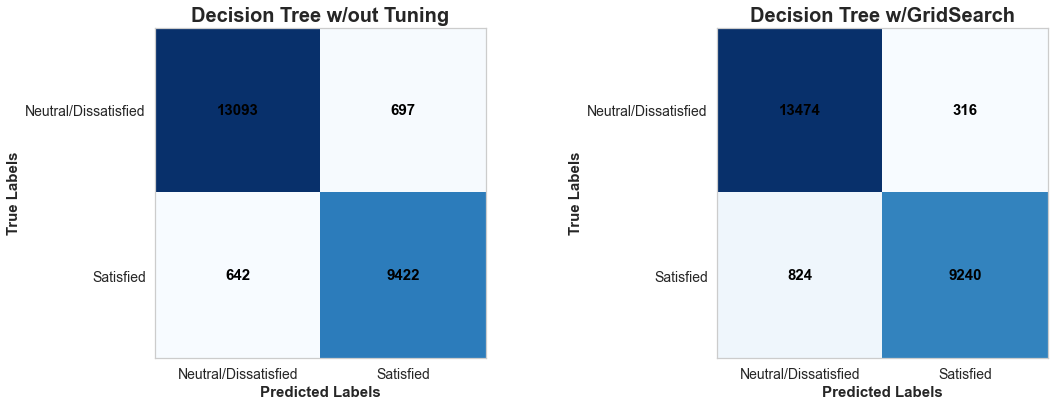

In [941]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix 
axs[0].imshow(cm_v, cmap='Blues')
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('Decision Tree w/out Tuning', fontweight='bold', fontsize='20')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

# customize the value inside the boxes 
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_v[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

# plot second confusion matrix
conf_mat_dt_best = confusion_matrix(y_test, y_test_pred_dt_best)
axs[1].imshow(conf_mat_dt_best, cmap='Blues')
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[1].set_title('Decision Tree w/GridSearch', fontweight='bold', fontsize='20')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

# customize the values inside the boxes
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, conf_mat_dt_best[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');
        
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.7)

plt.show()


#### Confusion Matrix Results:
- When comparing the two confusion matrixis, the Decision Tree using GridSearch has the better results for my goals of finding the passengers that were neutral/dissatisfied.
    - The model is better at predicting true negatives, and has a lower number of false positives. This means that the model is better at reducing the number of passengers that were falsely predicted at satisfied when they were actually neutral/dissatisfied.  

### Decision Tree (No Tuning) Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>93%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>94%</mark>

### Decision Tree With GridSearchCV Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>93%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>95%</mark>

### Model 3: Random Forest
- Like the decision tree models, I will run a vanilla random forest classification model on the training and test data first. 
- I will follow it up with a second random forest classification model using GridSearchCV to see if we get more accuarate predictions. 

#### Create Random Forest Pipeline

In [942]:
# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

#Define the pipeline
rf_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

#Fit the pipeline on the training data
rf_pipeline.fit(X_train, y_train)

#Generate predictions for the training and test data
y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf = rf_pipeline.predict(X_test)

#Print classification report for training data
print('\nClassification Report: **Random Forest With w/out Tuning On Training Data**')
print(classification_report(y_train, y_train_pred_rf, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for Training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_train_pred_rf))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('========================================================================')

#Print classification report for test data
print('\nClassification Report: **Random Forest w/out Tuning On Test Data**')
print(classification_report(y_test, y_test_pred_rf, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for Test data
print('Confusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_test_pred_rf))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)



Classification Report: **Random Forest With w/out Tuning On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      1.00      1.00     40987
              satisfied       1.00      1.00      1.00     30574

               accuracy                           1.00     71561
              macro avg       1.00      1.00      1.00     71561
           weighted avg       1.00      1.00      1.00     71561

Confusion Matrix - Training Data:
[[40986     1]
 [    0 30574]]
AUC: 0.9999878010100763



Classification Report: **Random Forest w/out Tuning On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96

#### Classification Report On Training Data
- Just like decision trees, random forest requires a lot of tuning to be accurate. Similar to our vanilla decision tree model, our vanilla random forest model gave us the same results on our training data, and shows signs of overfitting. 

#### Classification Report On Test Data
- The scores are great on the test data. However this is deceiving since we do have some overfitting. 

#### Confusion Matrix of Random Forest w/out Tuning

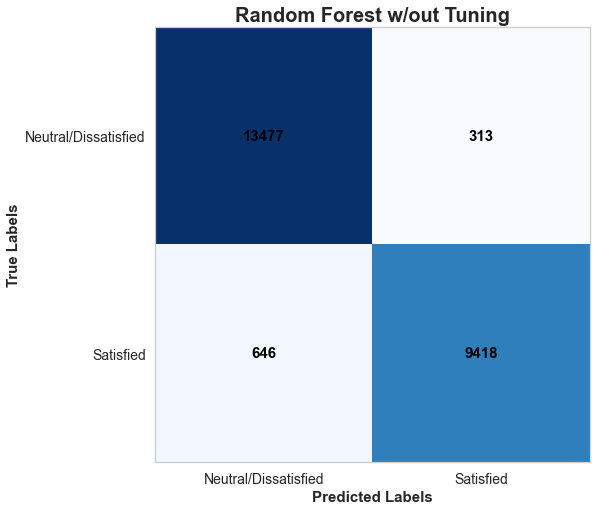

In [943]:
# get confusion matrix
cm_rfv = confusion_matrix(y_test, y_test_pred_rf)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_rfv, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Random Forest w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#Customize the value inside the boxes
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_rfv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

### Random Forest With No Tuning Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>96%</mark> 
- **<mark>AUC Score</mark>**: <mark>96%</mark>

### Random Forest with GridSearchCV
- Use GridSearchCV to find the best hyperparameters to get the best model results.
- Due to a long run time compared to the GridSearch on the decision tree, I have removed min_samples_split because it is less critical than parameter. 
- I also decreased the max_depth to help shorten the run time. 

#### Create New Pipeline With GridSearch

In [944]:
# Define the hyperparameters for the tuning
params = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__n_estimators': [10, 12, 15, 20],
    'clf__max_depth': [2, 3, 5, 7, 9],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

#Define the pipeline
rf_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Create a grid search object 
rf_gs = GridSearchCV(rf_pipeline, params, cv=5)

# Fit the pipeline on the training data
rf_gs.fit(X_train, y_train)

# Print the best hyperparameters and best score 
print("Best parameters: ", rf_gs.best_params_)
print("Best score: ", rf_gs.best_score_)

# Fit the pipeline on the training data with the best hyperparameters
rf_pipeline.set_params(**rf_gs.best_params_)
rf_pipeline.fit(X_train, y_train)

# Generate predictions for the training and test data
y_train_pred_rf_best = rf_gs.predict(X_train)
y_test_pred_rf_best = rf_gs.predict(X_test)

Best parameters:  {'clf__criterion': 'gini', 'clf__max_depth': 9, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 20}
Best score:  0.9412808824134166


In [945]:
# Print classification report for training data
print('\nClassification Report: **Random Forest On Training Data with Best Parameters**')
print(classification_report(y_train, y_train_pred_rf_best, target_names=['neutral or dissatisfied', 'satisfied']))

# Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_train_pred_rf_best))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred_rf_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('================================================================================')

# Print classification report for test data
print('\nClassification Report: **Random Forest On Test Data with Best Parameters**')
print(classification_report(y_test, y_test_pred_rf_best, target_names=['neutral or dissatisfied', 'satisfied']))

# Display confusion matrix for test data
print('Confusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_test_pred_rf_best))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred_rf_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)



Classification Report: **Random Forest On Training Data with Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     40987
              satisfied       0.94      0.93      0.93     30574

               accuracy                           0.94     71561
              macro avg       0.94      0.94      0.94     71561
           weighted avg       0.94      0.94      0.94     71561

Confusion Matrix - Training Data:
[[39080  1907]
 [ 2144 28430]]
AUC: 0.9416740548347174



Classification Report: **Random Forest On Test Data with Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     13790
              satisfied       0.93      0.93      0.93     10064

               accuracy                           0.94     23854
              macro avg       0.94      0.94      0.94     23854
           weighted avg       0.9

#### Results on Training Data:
- It appears the issue of over fitting has been resolved after applying gridsearch. All the metrics are great. 

#### Results On Test Data:
- The evaluation metrics are fantastic on the test data as well, which is a great sign. However, I think we can find a model that is better at predicting false negatives and reducing false positives. 

#### Confusion Matrix On Test Data

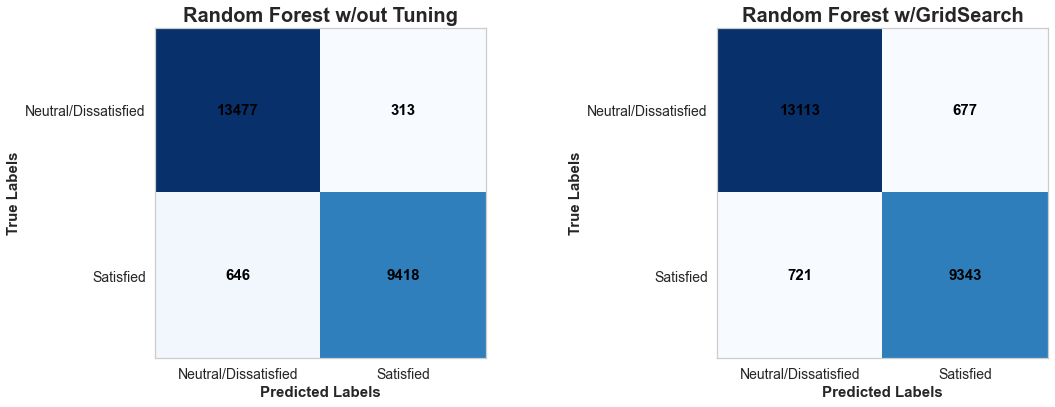

In [946]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_rfv, cmap='Blues')
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('Random Forest w/out Tuning', fontweight='bold', fontsize='20')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

#customize the value inside the boxes
for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_rfv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

# plot second confusion matrix
cm_rfgs = confusion_matrix(y_test, y_test_pred_rf_best)
axs[1].imshow(cm_rfgs, cmap='Blues')
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[1].set_title('Random Forest w/GridSearch', fontweight='bold', fontsize='20')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

#Customize the values inside the boxes
for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_rfgs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');
        
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.7)

plt.show()


#### Confusion Matrix Results:
- Random forest models tend to perform better when data is not balanced. This is why the model with tuning did not do as well at predicting true negatives, false positives, and false negatives. 

### Random Forest (No Tuning) Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>95%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>97%</mark> 
- **<mark>AUC Score</mark>**: <mark>95%</mark>

### Random Forest With GridSearchCV Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>93%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>94%</mark>

### Model 4: XGBoost (No Tuning)
- Like the catboost, I will create two different pipelines:
    - The first pipeline will run XGBoost without any hyperparameter tuning. 
    - The second pipeline will be integrated with RandomSearchCV. 

#### XGBoost Pipeline

In [947]:
# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

#Define the pipeline
xgb_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', xgb.XGBClassifier())
])

# Fit the pipeline to the training data 
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_xgb_train = xgb_pipeline.predict(X_train)
y_pred_xgb_test = xgb_pipeline.predict(X_test)

# Display the classification report for the training and test data
print('Classification Report: **XGBoost w/out Tuning On Training Data**')
print(classification_report(y_train, y_pred_xgb_train, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_pred_xgb_train))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_xgb_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('==================================================================')

print('\nClassification Report: **XGBoost w/out Tuning On Test Data**')
print(classification_report(y_test, y_pred_xgb_test, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for test data
print('\nConfusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_pred_xgb_test))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_xgb_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)

Classification Report: **XGBoost w/out Tuning On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.99      0.98     40987
              satisfied       0.98      0.95      0.97     30574

               accuracy                           0.97     71561
              macro avg       0.98      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561

Confusion Matrix - Training Data:
[[40536   451]
 [ 1426 29148]]
AUC: 0.9711777871726218



Classification Report: **XGBoost w/out Tuning On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96      0.96     238

#### Results on Training Data:
- Evaluation metrics show high scores, and the confusion matrix shows improvements as well. 

#### Results On Test Data:
- XGBoost is high performing model even without any tuning. This model performed well on both the training and test set which is very good sign for our model. 
- The confusion matrix also shows improvement from previous models. 

#### Confusion Matrix On Test Data

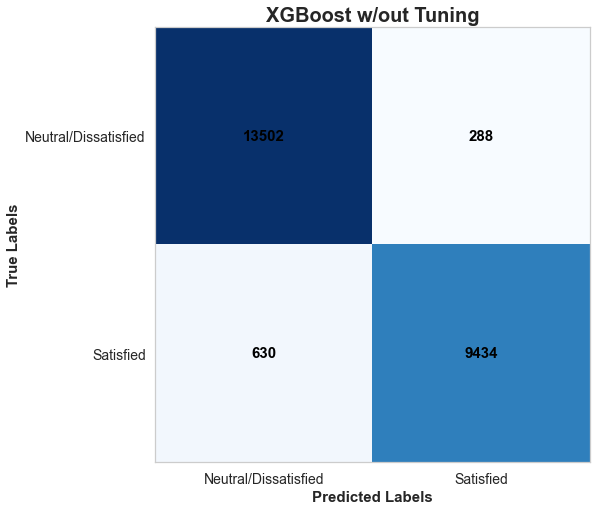

In [948]:
# get confusion matrix
cm_xgbv = confusion_matrix(y_test, y_pred_xgb_test)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_xgbv, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('XGBoost w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_xgbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

### XGBoost with RandomSearchCV

#### Create New Pipeline With RandomSearch

In [949]:
# Define parameter grid 
param_grid = {
    'clf__n_estimators': [50, 100, 200, 500, 1000],
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'clf__max_depth': [3, 4, 5, 6, 8, 10],
    'clf__min_child_weight': [1, 3, 5, 7],
}

# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

#Define the pipeline
xgb_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', xgb.XGBClassifier())
])

# Create a randomized search object 
xgb_rs = RandomizedSearchCV(xgb_pipeline, 
                            param_distributions=param_grid,
                            cv=5, 
                            n_iter=20, 
                            n_jobs=-1, 
                            scoring='roc_auc',
                            verbose=1, 
                            random_state=42)

# Fit the randomized search to the training data
xgb_rs.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", xgb_rs.best_params_)
print("Best score:", xgb_rs.best_score_)

# Fit the pipeline on the training data with the best hyperparameters
xgb_pipeline.set_params(**cbc_rs.best_params_)
xgb_pipeline.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_xgb_train_best = xgb_pipeline.predict(X_train)
y_pred_xgb_test_best = xgb_pipeline.predict(X_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 37.1min finished


Best hyperparameters: {'clf__n_estimators': 1000, 'clf__min_child_weight': 3, 'clf__max_depth': 10, 'clf__learning_rate': 0.01}
Best score: 0.993324951900043
[00:30:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { iterations, l2_leaf_reg, random_strength } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [950]:
# Display the classification report for the training and test data
print('Classification Report: **XGBoost On Training Data With Best Parameters**')
print(classification_report(y_train, y_pred_xgb_train_best, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_pred_xgb_train_best))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_xgb_train_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('==========================================================================')

print('\nClassification Report: **XGBoost On Test Data With Best Parameters**')
print(classification_report(y_test, y_pred_xgb_test_best, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for test data
print('\nConfusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_pred_xgb_test_best))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_xgb_test_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)

Classification Report: **XGBoost On Training Data With Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.96     40987
              satisfied       0.97      0.93      0.95     30574

               accuracy                           0.96     71561
              macro avg       0.96      0.95      0.96     71561
           weighted avg       0.96      0.96      0.96     71561

Confusion Matrix - Training Data:
[[40123   864]
 [ 2186 28388]]
AUC: 0.9537107432103301



Classification Report: **XGBoost On Test Data With Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.96     13790
              satisfied       0.97      0.93      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.95      0.96     23854
           weighted avg       0.96      0.96  

#### Results on Training Data:
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.95, which means that 95% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.98, which means that 98% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.96 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.96

#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 95%, which means that out of all the customers predicted as neutral or dissatisfied, 95% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 98%, which means that out of all the actual neutral or dissatisfied customers, 98% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 96%.
- **Accuracy**: Overall accuracy of 96%, which means that 95% of the predictions made by the model on the test set were correct.

#### Confusion Matrix On Test Data

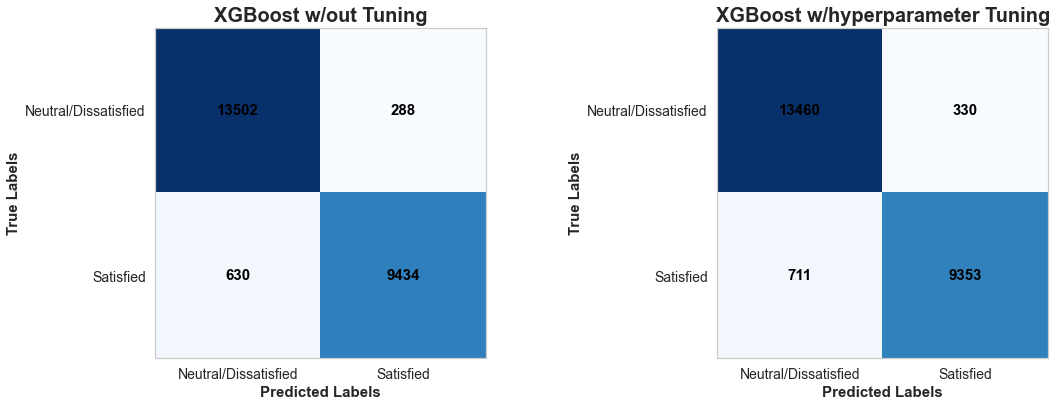

In [951]:
# create a figure with two columns and one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_xgbv, cmap='Blues')
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('XGBoost w/out Tuning', fontweight='bold', fontsize='20')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_xgbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# plot second confusion matrix
cm_xgbrs = confusion_matrix(y_test, y_pred_xgb_test_best)
axs[1].imshow(cm_xgbrs, cmap='Blues')
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[1].set_title('XGBoost w/hyperparameter Tuning', fontweight='bold', fontsize='20')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_xgbrs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

plt.show()

#### Confusion Matrix Results:
- Comparing the two matrixis of the test data, the model with no tuning actually performed better at predicting true negatives and true positives. The model with no tuning also did a better job at reducing the number of false positives and false negatives. XGBoost with hypertuning is not necessary. 

### XGBoost (No Tuning) Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>96%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### XGBoost With RandomSearchCV Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>95%</mark>

### Model 5: CatBoost Classifier
- For this model I will build two models using the catboost classifier.
    - The first model will be run with no tuning.
    - The second model I will use catboost with RandomSearchCV. 
        - It is less computationally expensive than GridSearchCV.

#### CatBoost Pipeline

In [952]:
# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

#Define the pipeline
cbc_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', ctb.CatBoostClassifier())
])

# Fit the pipeline to the training data 
cbc_pipeline.fit(X_train, y_train)

# Make predictions on the training and test data
y_pred_cbc_train = cbc_pipeline.predict(X_train)
y_pred_cbc_test = cbc_pipeline.predict(X_test)

# Display the classification report for the training and test data
print('Classification Report: **CatBoost w/out Tuning On Training Data**')
print(classification_report(y_train, y_pred_cbc_train, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_pred_cbc_train))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_cbc_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('==================================================================')

print('\nClassification Report: **CatBoost w/out Tuning On Test Data**')
print(classification_report(y_test, y_pred_cbc_test, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for test data
print('\nConfusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_pred_cbc_test))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_cbc_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)

Learning rate set to 0.063809
0:	learn: 0.6054692	total: 19.3ms	remaining: 19.3s
1:	learn: 0.5045329	total: 29.9ms	remaining: 14.9s
2:	learn: 0.4286476	total: 40.2ms	remaining: 13.3s
3:	learn: 0.3842151	total: 49.8ms	remaining: 12.4s
4:	learn: 0.3477354	total: 57.7ms	remaining: 11.5s
5:	learn: 0.3233384	total: 66.1ms	remaining: 10.9s
6:	learn: 0.3017080	total: 74.6ms	remaining: 10.6s
7:	learn: 0.2768452	total: 82.9ms	remaining: 10.3s
8:	learn: 0.2600970	total: 91.2ms	remaining: 10s
9:	learn: 0.2375649	total: 99.1ms	remaining: 9.81s
10:	learn: 0.2245399	total: 107ms	remaining: 9.64s
11:	learn: 0.2151496	total: 115ms	remaining: 9.51s
12:	learn: 0.2074994	total: 126ms	remaining: 9.57s
13:	learn: 0.1998710	total: 134ms	remaining: 9.46s
14:	learn: 0.1948688	total: 143ms	remaining: 9.4s
15:	learn: 0.1910807	total: 153ms	remaining: 9.41s
16:	learn: 0.1822391	total: 161ms	remaining: 9.32s
17:	learn: 0.1791144	total: 169ms	remaining: 9.21s
18:	learn: 0.1739450	total: 177ms	remaining: 9.13s
19:	

176:	learn: 0.0978461	total: 1.59s	remaining: 7.39s
177:	learn: 0.0977797	total: 1.6s	remaining: 7.4s
178:	learn: 0.0976880	total: 1.61s	remaining: 7.4s
179:	learn: 0.0975294	total: 1.62s	remaining: 7.4s
180:	learn: 0.0974637	total: 1.63s	remaining: 7.39s
181:	learn: 0.0973995	total: 1.64s	remaining: 7.38s
182:	learn: 0.0972597	total: 1.65s	remaining: 7.37s
183:	learn: 0.0971649	total: 1.66s	remaining: 7.35s
184:	learn: 0.0970661	total: 1.67s	remaining: 7.34s
185:	learn: 0.0969333	total: 1.67s	remaining: 7.33s
186:	learn: 0.0967949	total: 1.68s	remaining: 7.32s
187:	learn: 0.0966868	total: 1.69s	remaining: 7.3s
188:	learn: 0.0966339	total: 1.7s	remaining: 7.29s
189:	learn: 0.0965139	total: 1.71s	remaining: 7.27s
190:	learn: 0.0963849	total: 1.71s	remaining: 7.26s
191:	learn: 0.0962856	total: 1.72s	remaining: 7.25s
192:	learn: 0.0961907	total: 1.73s	remaining: 7.23s
193:	learn: 0.0960530	total: 1.74s	remaining: 7.22s
194:	learn: 0.0959333	total: 1.75s	remaining: 7.21s
195:	learn: 0.0958

353:	learn: 0.0860902	total: 3.17s	remaining: 5.79s
354:	learn: 0.0860269	total: 3.18s	remaining: 5.79s
355:	learn: 0.0859882	total: 3.19s	remaining: 5.78s
356:	learn: 0.0859695	total: 3.2s	remaining: 5.77s
357:	learn: 0.0858866	total: 3.21s	remaining: 5.76s
358:	learn: 0.0858417	total: 3.22s	remaining: 5.75s
359:	learn: 0.0856796	total: 3.23s	remaining: 5.74s
360:	learn: 0.0856341	total: 3.24s	remaining: 5.73s
361:	learn: 0.0856019	total: 3.24s	remaining: 5.72s
362:	learn: 0.0855530	total: 3.25s	remaining: 5.71s
363:	learn: 0.0855232	total: 3.26s	remaining: 5.7s
364:	learn: 0.0854803	total: 3.27s	remaining: 5.68s
365:	learn: 0.0854530	total: 3.28s	remaining: 5.67s
366:	learn: 0.0854095	total: 3.28s	remaining: 5.66s
367:	learn: 0.0853784	total: 3.29s	remaining: 5.65s
368:	learn: 0.0853095	total: 3.3s	remaining: 5.64s
369:	learn: 0.0852586	total: 3.31s	remaining: 5.63s
370:	learn: 0.0852326	total: 3.31s	remaining: 5.62s
371:	learn: 0.0851744	total: 3.32s	remaining: 5.61s
372:	learn: 0.0

525:	learn: 0.0794527	total: 4.59s	remaining: 4.14s
526:	learn: 0.0794274	total: 4.61s	remaining: 4.13s
527:	learn: 0.0793864	total: 4.62s	remaining: 4.13s
528:	learn: 0.0793625	total: 4.63s	remaining: 4.12s
529:	learn: 0.0793428	total: 4.63s	remaining: 4.11s
530:	learn: 0.0793088	total: 4.64s	remaining: 4.1s
531:	learn: 0.0792709	total: 4.65s	remaining: 4.09s
532:	learn: 0.0792345	total: 4.66s	remaining: 4.08s
533:	learn: 0.0791975	total: 4.67s	remaining: 4.07s
534:	learn: 0.0791401	total: 4.67s	remaining: 4.06s
535:	learn: 0.0790852	total: 4.68s	remaining: 4.05s
536:	learn: 0.0790404	total: 4.69s	remaining: 4.04s
537:	learn: 0.0790163	total: 4.7s	remaining: 4.03s
538:	learn: 0.0789836	total: 4.71s	remaining: 4.02s
539:	learn: 0.0789365	total: 4.71s	remaining: 4.01s
540:	learn: 0.0789054	total: 4.72s	remaining: 4s
541:	learn: 0.0788845	total: 4.73s	remaining: 4s
542:	learn: 0.0788617	total: 4.74s	remaining: 3.99s
543:	learn: 0.0788407	total: 4.74s	remaining: 3.98s
544:	learn: 0.078822

693:	learn: 0.0742954	total: 5.99s	remaining: 2.64s
694:	learn: 0.0742652	total: 6.01s	remaining: 2.64s
695:	learn: 0.0742406	total: 6.02s	remaining: 2.63s
696:	learn: 0.0742250	total: 6.03s	remaining: 2.62s
697:	learn: 0.0741989	total: 6.04s	remaining: 2.61s
698:	learn: 0.0741727	total: 6.04s	remaining: 2.6s
699:	learn: 0.0741477	total: 6.05s	remaining: 2.59s
700:	learn: 0.0741074	total: 6.06s	remaining: 2.58s
701:	learn: 0.0740916	total: 6.07s	remaining: 2.58s
702:	learn: 0.0740605	total: 6.07s	remaining: 2.57s
703:	learn: 0.0740321	total: 6.08s	remaining: 2.56s
704:	learn: 0.0740176	total: 6.09s	remaining: 2.55s
705:	learn: 0.0739970	total: 6.1s	remaining: 2.54s
706:	learn: 0.0739761	total: 6.11s	remaining: 2.53s
707:	learn: 0.0739624	total: 6.11s	remaining: 2.52s
708:	learn: 0.0739258	total: 6.12s	remaining: 2.51s
709:	learn: 0.0739014	total: 6.13s	remaining: 2.5s
710:	learn: 0.0738788	total: 6.14s	remaining: 2.49s
711:	learn: 0.0738599	total: 6.14s	remaining: 2.48s
712:	learn: 0.0

862:	learn: 0.0702278	total: 7.39s	remaining: 1.17s
863:	learn: 0.0702132	total: 7.41s	remaining: 1.17s
864:	learn: 0.0701936	total: 7.42s	remaining: 1.16s
865:	learn: 0.0701597	total: 7.43s	remaining: 1.15s
866:	learn: 0.0701453	total: 7.43s	remaining: 1.14s
867:	learn: 0.0701077	total: 7.44s	remaining: 1.13s
868:	learn: 0.0700956	total: 7.45s	remaining: 1.12s
869:	learn: 0.0700684	total: 7.46s	remaining: 1.11s
870:	learn: 0.0700308	total: 7.47s	remaining: 1.11s
871:	learn: 0.0700137	total: 7.48s	remaining: 1.1s
872:	learn: 0.0699895	total: 7.49s	remaining: 1.09s
873:	learn: 0.0699736	total: 7.5s	remaining: 1.08s
874:	learn: 0.0699566	total: 7.5s	remaining: 1.07s
875:	learn: 0.0699377	total: 7.51s	remaining: 1.06s
876:	learn: 0.0699127	total: 7.52s	remaining: 1.05s
877:	learn: 0.0698933	total: 7.53s	remaining: 1.04s
878:	learn: 0.0698678	total: 7.54s	remaining: 1.04s
879:	learn: 0.0698532	total: 7.54s	remaining: 1.03s
880:	learn: 0.0698317	total: 7.55s	remaining: 1.02s
881:	learn: 0.0

#### Results on Training Data:
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.97, which means that 97% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.99, which means that 99% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.98 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.97

#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 95%, which means that out of all the customers predicted as neutral or dissatisfied, 95% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 98%, which means that out of all the actual neutral or dissatisfied customers, 98% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 97%.
- **Accuracy**: Overall accuracy of 96%, which means that 96% of the predictions made by the model on the test set were correct.

#### Confusion Matrix On Test Data w/out Tuning

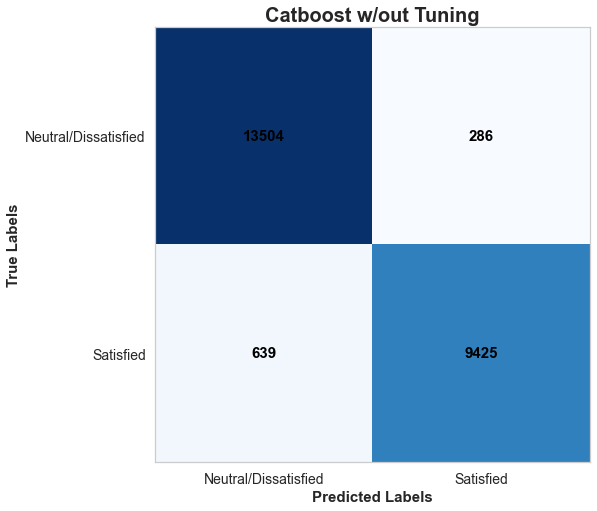

In [953]:
# get confusion matrix
cm_cbv = confusion_matrix(y_test, y_pred_cbc_test)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_cbv, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Catboost w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_cbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

### CatBoost With No Tuning Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>96%</mark>

### CatBoost with RandomSearchCV
- RandomSearchCV is similar to GridSearchCV, however RandomSearchCV performs a random search over the parameter space, rather than an exhaustive search like GridSearchCV performs. 
- RandomSearchCV is much less computationally expensive making it perform faster, especially for larger datasets. 

#### Create New Pipeline With RandomSearch

In [954]:
# Define the hyperparameters to search
param_dist = {
    'clf__iterations': sp_randint(500, 2000),
    'clf__learning_rate': [0.01, 0.1, 1],
    'clf__max_depth': sp_randint(4, 10),
    'clf__random_strength': [0, 1, 3, 5, 7, 9], 
    'clf__l2_leaf_reg': [2, 4, 6, 8, 10]
}

# Create the encoding transformer
encoder = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(categories=[[1, 2, 3, 4, 5]]*len(ordinal_cols)), ordinal_cols),
    ('onehot_encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

#Define the pipeline
cbc_pipeline = Pipeline([
    ('encoder', encoder),
    ('scaler', MinMaxScaler()),
    ('clf', ctb.CatBoostClassifier())
])

# Create a randomized search object 
cbc_rs = RandomizedSearchCV(cbc_pipeline, param_distributions=param_dist, 
                            cv=5, n_iter=20, n_jobs=-1, verbose =1, random_state=42)

# Fit the randomized search to the training data
cbc_rs.fit(X_train, y_train)

# Print the best hyperparameters and best score 
print("Best parameters: ", cbc_rs.best_params_)
print("Best score: ", cbc_rs.best_score_)

# Fit the pipeline on the training data with the best hyperparameters
cbc_pipeline.set_params(**cbc_rs.best_params_)
cbc_pipeline.fit(X_train, y_train)


# Get the feature names after encoding
onehot_cols = cbc_pipeline.named_steps['encoder'].named_transformers_['onehot_encoder'].get_feature_names(categorical_cols)
ordinal_cols_encodedb = [f'ordinal_encoder__x{i}' for i in range(len(ordinal_cols))]
ordinal_cols = cbc_pipeline.named_steps['encoder'].named_transformers_['ordinal_encoder'].categories_
ordinal_cols = [f'ordinal_encoder__{i}__x{j}' for i in range(len(ordinal_cols)) for j in range(len(ordinal_cols[i]))]
encoded_cols = list(onehot_cols) + ordinal_cols_encoded
all_cols = encoded_cols + numerical_cols


# Get feature importance
feat_importance = cbc_pipeline.named_steps['clf'].get_feature_importance()

# Make predictions on the training and test data
y_pred_cbc_train_best = cbc_pipeline.predict(X_train)
y_pred_cbc_test_best = cbc_pipeline.predict(X_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.2min finished


0:	learn: 0.6043300	total: 10.4ms	remaining: 12.8s
1:	learn: 0.5226133	total: 17.5ms	remaining: 10.7s
2:	learn: 0.4498188	total: 24.5ms	remaining: 10s
3:	learn: 0.3995633	total: 32.5ms	remaining: 9.96s
4:	learn: 0.3596875	total: 41.8ms	remaining: 10.2s
5:	learn: 0.3262778	total: 50.4ms	remaining: 10.3s
6:	learn: 0.3094668	total: 58.9ms	remaining: 10.3s
7:	learn: 0.2901541	total: 65.8ms	remaining: 10s
8:	learn: 0.2778805	total: 73ms	remaining: 9.89s
9:	learn: 0.2637492	total: 80.3ms	remaining: 9.79s
10:	learn: 0.2586802	total: 87ms	remaining: 9.64s
11:	learn: 0.2477595	total: 93.8ms	remaining: 9.52s
12:	learn: 0.2388474	total: 101ms	remaining: 9.45s
13:	learn: 0.2296943	total: 108ms	remaining: 9.38s
14:	learn: 0.2256562	total: 115ms	remaining: 9.31s
15:	learn: 0.2223374	total: 122ms	remaining: 9.26s
16:	learn: 0.2132777	total: 129ms	remaining: 9.21s
17:	learn: 0.2107981	total: 136ms	remaining: 9.16s
18:	learn: 0.2040133	total: 143ms	remaining: 9.12s
19:	learn: 0.2010595	total: 150ms	rem

167:	learn: 0.1083864	total: 1.2s	remaining: 7.57s
168:	learn: 0.1081383	total: 1.21s	remaining: 7.57s
169:	learn: 0.1079563	total: 1.21s	remaining: 7.55s
170:	learn: 0.1078237	total: 1.22s	remaining: 7.55s
171:	learn: 0.1075808	total: 1.23s	remaining: 7.55s
172:	learn: 0.1074791	total: 1.24s	remaining: 7.54s
173:	learn: 0.1072585	total: 1.24s	remaining: 7.54s
174:	learn: 0.1071210	total: 1.25s	remaining: 7.54s
175:	learn: 0.1069085	total: 1.26s	remaining: 7.53s
176:	learn: 0.1065601	total: 1.27s	remaining: 7.53s
177:	learn: 0.1063103	total: 1.27s	remaining: 7.52s
178:	learn: 0.1061449	total: 1.28s	remaining: 7.51s
179:	learn: 0.1059505	total: 1.29s	remaining: 7.5s
180:	learn: 0.1058302	total: 1.29s	remaining: 7.49s
181:	learn: 0.1056467	total: 1.3s	remaining: 7.49s
182:	learn: 0.1054843	total: 1.31s	remaining: 7.48s
183:	learn: 0.1053814	total: 1.32s	remaining: 7.48s
184:	learn: 0.1051626	total: 1.32s	remaining: 7.47s
185:	learn: 0.1045465	total: 1.33s	remaining: 7.48s
186:	learn: 0.1

337:	learn: 0.0914938	total: 2.39s	remaining: 6.29s
338:	learn: 0.0914540	total: 2.4s	remaining: 6.29s
339:	learn: 0.0914157	total: 2.4s	remaining: 6.28s
340:	learn: 0.0913463	total: 2.41s	remaining: 6.27s
341:	learn: 0.0913052	total: 2.42s	remaining: 6.27s
342:	learn: 0.0912790	total: 2.42s	remaining: 6.26s
343:	learn: 0.0912062	total: 2.43s	remaining: 6.25s
344:	learn: 0.0911702	total: 2.44s	remaining: 6.24s
345:	learn: 0.0911254	total: 2.44s	remaining: 6.24s
346:	learn: 0.0910492	total: 2.45s	remaining: 6.23s
347:	learn: 0.0908463	total: 2.46s	remaining: 6.22s
348:	learn: 0.0908149	total: 2.46s	remaining: 6.21s
349:	learn: 0.0907450	total: 2.47s	remaining: 6.21s
350:	learn: 0.0907106	total: 2.48s	remaining: 6.2s
351:	learn: 0.0906492	total: 2.48s	remaining: 6.19s
352:	learn: 0.0905839	total: 2.49s	remaining: 6.18s
353:	learn: 0.0905187	total: 2.5s	remaining: 6.17s
354:	learn: 0.0904719	total: 2.5s	remaining: 6.17s
355:	learn: 0.0904207	total: 2.51s	remaining: 6.16s
356:	learn: 0.090

508:	learn: 0.0844881	total: 3.58s	remaining: 5.07s
509:	learn: 0.0843975	total: 3.59s	remaining: 5.06s
510:	learn: 0.0843662	total: 3.6s	remaining: 5.06s
511:	learn: 0.0843260	total: 3.61s	remaining: 5.05s
512:	learn: 0.0842632	total: 3.61s	remaining: 5.04s
513:	learn: 0.0842056	total: 3.62s	remaining: 5.04s
514:	learn: 0.0841868	total: 3.63s	remaining: 5.03s
515:	learn: 0.0841355	total: 3.63s	remaining: 5.02s
516:	learn: 0.0840940	total: 3.64s	remaining: 5.01s
517:	learn: 0.0840612	total: 3.65s	remaining: 5.01s
518:	learn: 0.0840397	total: 3.65s	remaining: 5s
519:	learn: 0.0840183	total: 3.66s	remaining: 4.99s
520:	learn: 0.0840013	total: 3.67s	remaining: 4.99s
521:	learn: 0.0839743	total: 3.68s	remaining: 4.98s
522:	learn: 0.0839376	total: 3.68s	remaining: 4.97s
523:	learn: 0.0839150	total: 3.69s	remaining: 4.96s
524:	learn: 0.0838951	total: 3.7s	remaining: 4.96s
525:	learn: 0.0838505	total: 3.7s	remaining: 4.95s
526:	learn: 0.0838341	total: 3.71s	remaining: 4.94s
527:	learn: 0.0838

677:	learn: 0.0800183	total: 4.78s	remaining: 3.88s
678:	learn: 0.0800023	total: 4.78s	remaining: 3.87s
679:	learn: 0.0799597	total: 4.79s	remaining: 3.87s
680:	learn: 0.0799215	total: 4.8s	remaining: 3.86s
681:	learn: 0.0799012	total: 4.8s	remaining: 3.85s
682:	learn: 0.0798847	total: 4.81s	remaining: 3.85s
683:	learn: 0.0798495	total: 4.82s	remaining: 3.84s
684:	learn: 0.0798143	total: 4.82s	remaining: 3.83s
685:	learn: 0.0797896	total: 4.83s	remaining: 3.82s
686:	learn: 0.0797680	total: 4.84s	remaining: 3.82s
687:	learn: 0.0797453	total: 4.85s	remaining: 3.81s
688:	learn: 0.0797262	total: 4.86s	remaining: 3.81s
689:	learn: 0.0797035	total: 4.86s	remaining: 3.8s
690:	learn: 0.0796926	total: 4.87s	remaining: 3.79s
691:	learn: 0.0796687	total: 4.88s	remaining: 3.78s
692:	learn: 0.0796560	total: 4.88s	remaining: 3.78s
693:	learn: 0.0796417	total: 4.89s	remaining: 3.77s
694:	learn: 0.0796170	total: 4.9s	remaining: 3.76s
695:	learn: 0.0795979	total: 4.91s	remaining: 3.76s
696:	learn: 0.07

850:	learn: 0.0760467	total: 5.97s	remaining: 2.65s
851:	learn: 0.0760258	total: 5.98s	remaining: 2.65s
852:	learn: 0.0760063	total: 5.99s	remaining: 2.64s
853:	learn: 0.0759871	total: 5.99s	remaining: 2.63s
854:	learn: 0.0759581	total: 6s	remaining: 2.63s
855:	learn: 0.0759233	total: 6.01s	remaining: 2.62s
856:	learn: 0.0759055	total: 6.01s	remaining: 2.61s
857:	learn: 0.0758923	total: 6.02s	remaining: 2.6s
858:	learn: 0.0758761	total: 6.03s	remaining: 2.6s
859:	learn: 0.0758617	total: 6.04s	remaining: 2.59s
860:	learn: 0.0758542	total: 6.04s	remaining: 2.58s
861:	learn: 0.0758363	total: 6.05s	remaining: 2.58s
862:	learn: 0.0758280	total: 6.06s	remaining: 2.57s
863:	learn: 0.0758079	total: 6.07s	remaining: 2.56s
864:	learn: 0.0757954	total: 6.07s	remaining: 2.56s
865:	learn: 0.0757843	total: 6.08s	remaining: 2.55s
866:	learn: 0.0757553	total: 6.09s	remaining: 2.54s
867:	learn: 0.0757341	total: 6.09s	remaining: 2.53s
868:	learn: 0.0757184	total: 6.1s	remaining: 2.53s
869:	learn: 0.0756

1023:	learn: 0.0729718	total: 7.17s	remaining: 1.44s
1024:	learn: 0.0729595	total: 7.17s	remaining: 1.43s
1025:	learn: 0.0729281	total: 7.18s	remaining: 1.42s
1026:	learn: 0.0729137	total: 7.19s	remaining: 1.41s
1027:	learn: 0.0728970	total: 7.2s	remaining: 1.41s
1028:	learn: 0.0728724	total: 7.2s	remaining: 1.4s
1029:	learn: 0.0728568	total: 7.21s	remaining: 1.39s
1030:	learn: 0.0728443	total: 7.22s	remaining: 1.39s
1031:	learn: 0.0728277	total: 7.22s	remaining: 1.38s
1032:	learn: 0.0728101	total: 7.23s	remaining: 1.37s
1033:	learn: 0.0727975	total: 7.24s	remaining: 1.36s
1034:	learn: 0.0727805	total: 7.24s	remaining: 1.36s
1035:	learn: 0.0727590	total: 7.25s	remaining: 1.35s
1036:	learn: 0.0727316	total: 7.26s	remaining: 1.34s
1037:	learn: 0.0727032	total: 7.26s	remaining: 1.34s
1038:	learn: 0.0726763	total: 7.27s	remaining: 1.33s
1039:	learn: 0.0726591	total: 7.28s	remaining: 1.32s
1040:	learn: 0.0726449	total: 7.28s	remaining: 1.31s
1041:	learn: 0.0726238	total: 7.29s	remaining: 1.

1192:	learn: 0.0700820	total: 8.35s	remaining: 252ms
1193:	learn: 0.0700677	total: 8.36s	remaining: 245ms
1194:	learn: 0.0700504	total: 8.37s	remaining: 238ms
1195:	learn: 0.0700473	total: 8.38s	remaining: 231ms
1196:	learn: 0.0700408	total: 8.38s	remaining: 224ms
1197:	learn: 0.0700297	total: 8.39s	remaining: 217ms
1198:	learn: 0.0700210	total: 8.4s	remaining: 210ms
1199:	learn: 0.0700056	total: 8.4s	remaining: 203ms
1200:	learn: 0.0699972	total: 8.41s	remaining: 196ms
1201:	learn: 0.0699798	total: 8.42s	remaining: 189ms
1202:	learn: 0.0699697	total: 8.42s	remaining: 182ms
1203:	learn: 0.0699531	total: 8.43s	remaining: 175ms
1204:	learn: 0.0699432	total: 8.44s	remaining: 168ms
1205:	learn: 0.0699270	total: 8.45s	remaining: 161ms
1206:	learn: 0.0699103	total: 8.45s	remaining: 154ms
1207:	learn: 0.0698938	total: 8.46s	remaining: 147ms
1208:	learn: 0.0698741	total: 8.46s	remaining: 140ms
1209:	learn: 0.0698640	total: 8.47s	remaining: 133ms
1210:	learn: 0.0698513	total: 8.48s	remaining: 1

140:	learn: 0.1163826	total: 993ms	remaining: 7.67s
141:	learn: 0.1160835	total: 1s	remaining: 7.66s
142:	learn: 0.1156614	total: 1.01s	remaining: 7.65s
143:	learn: 0.1146570	total: 1.01s	remaining: 7.64s
144:	learn: 0.1143148	total: 1.02s	remaining: 7.63s
145:	learn: 0.1140089	total: 1.03s	remaining: 7.62s
146:	learn: 0.1138219	total: 1.03s	remaining: 7.62s
147:	learn: 0.1136563	total: 1.04s	remaining: 7.61s
148:	learn: 0.1133466	total: 1.05s	remaining: 7.6s
149:	learn: 0.1131177	total: 1.05s	remaining: 7.59s
150:	learn: 0.1128566	total: 1.06s	remaining: 7.59s
151:	learn: 0.1125730	total: 1.07s	remaining: 7.58s
152:	learn: 0.1124073	total: 1.08s	remaining: 7.57s
153:	learn: 0.1121183	total: 1.08s	remaining: 7.56s
154:	learn: 0.1112260	total: 1.09s	remaining: 7.55s
155:	learn: 0.1110356	total: 1.1s	remaining: 7.54s
156:	learn: 0.1107739	total: 1.1s	remaining: 7.54s
157:	learn: 0.1106317	total: 1.11s	remaining: 7.53s
158:	learn: 0.1104342	total: 1.12s	remaining: 7.53s
159:	learn: 0.1102

306:	learn: 0.0932187	total: 2.19s	remaining: 6.57s
307:	learn: 0.0931085	total: 2.19s	remaining: 6.56s
308:	learn: 0.0930675	total: 2.2s	remaining: 6.55s
309:	learn: 0.0930378	total: 2.21s	remaining: 6.54s
310:	learn: 0.0929674	total: 2.21s	remaining: 6.54s
311:	learn: 0.0928926	total: 2.22s	remaining: 6.53s
312:	learn: 0.0928239	total: 2.23s	remaining: 6.52s
313:	learn: 0.0927988	total: 2.23s	remaining: 6.51s
314:	learn: 0.0927437	total: 2.24s	remaining: 6.5s
315:	learn: 0.0927067	total: 2.25s	remaining: 6.49s
316:	learn: 0.0926574	total: 2.25s	remaining: 6.49s
317:	learn: 0.0926271	total: 2.26s	remaining: 6.48s
318:	learn: 0.0925633	total: 2.27s	remaining: 6.47s
319:	learn: 0.0925241	total: 2.27s	remaining: 6.46s
320:	learn: 0.0924988	total: 2.28s	remaining: 6.45s
321:	learn: 0.0924695	total: 2.29s	remaining: 6.45s
322:	learn: 0.0923971	total: 2.29s	remaining: 6.44s
323:	learn: 0.0923178	total: 2.3s	remaining: 6.43s
324:	learn: 0.0922875	total: 2.31s	remaining: 6.42s
325:	learn: 0.0

477:	learn: 0.0854455	total: 3.37s	remaining: 5.3s
478:	learn: 0.0854157	total: 3.38s	remaining: 5.29s
479:	learn: 0.0853998	total: 3.39s	remaining: 5.29s
480:	learn: 0.0853555	total: 3.4s	remaining: 5.28s
481:	learn: 0.0853333	total: 3.4s	remaining: 5.27s
482:	learn: 0.0852725	total: 3.41s	remaining: 5.26s
483:	learn: 0.0852100	total: 3.42s	remaining: 5.26s
484:	learn: 0.0851810	total: 3.42s	remaining: 5.25s
485:	learn: 0.0851600	total: 3.43s	remaining: 5.24s
486:	learn: 0.0851063	total: 3.44s	remaining: 5.23s
487:	learn: 0.0850882	total: 3.44s	remaining: 5.23s
488:	learn: 0.0850512	total: 3.45s	remaining: 5.22s
489:	learn: 0.0850382	total: 3.46s	remaining: 5.21s
490:	learn: 0.0850016	total: 3.46s	remaining: 5.2s
491:	learn: 0.0849853	total: 3.47s	remaining: 5.2s
492:	learn: 0.0849488	total: 3.48s	remaining: 5.19s
493:	learn: 0.0849137	total: 3.48s	remaining: 5.18s
494:	learn: 0.0848868	total: 3.49s	remaining: 5.17s
495:	learn: 0.0848520	total: 3.5s	remaining: 5.17s
496:	learn: 0.0848

651:	learn: 0.0806681	total: 4.57s	remaining: 4.04s
652:	learn: 0.0806468	total: 4.58s	remaining: 4.04s
653:	learn: 0.0806274	total: 4.58s	remaining: 4.03s
654:	learn: 0.0806054	total: 4.59s	remaining: 4.02s
655:	learn: 0.0805929	total: 4.6s	remaining: 4.02s
656:	learn: 0.0805781	total: 4.61s	remaining: 4.01s
657:	learn: 0.0805519	total: 4.61s	remaining: 4s
658:	learn: 0.0805266	total: 4.62s	remaining: 4s
659:	learn: 0.0805068	total: 4.63s	remaining: 3.99s
660:	learn: 0.0804728	total: 4.63s	remaining: 3.98s
661:	learn: 0.0804493	total: 4.64s	remaining: 3.97s
662:	learn: 0.0804256	total: 4.65s	remaining: 3.97s
663:	learn: 0.0803986	total: 4.65s	remaining: 3.96s
664:	learn: 0.0803845	total: 4.66s	remaining: 3.95s
665:	learn: 0.0803606	total: 4.67s	remaining: 3.95s
666:	learn: 0.0803300	total: 4.67s	remaining: 3.94s
667:	learn: 0.0803036	total: 4.68s	remaining: 3.93s
668:	learn: 0.0802790	total: 4.69s	remaining: 3.92s
669:	learn: 0.0802456	total: 4.7s	remaining: 3.92s
670:	learn: 0.080219

823:	learn: 0.0766918	total: 5.76s	remaining: 2.83s
824:	learn: 0.0766714	total: 5.77s	remaining: 2.83s
825:	learn: 0.0766515	total: 5.78s	remaining: 2.82s
826:	learn: 0.0766146	total: 5.79s	remaining: 2.81s
827:	learn: 0.0765969	total: 5.79s	remaining: 2.81s
828:	learn: 0.0765811	total: 5.8s	remaining: 2.8s
829:	learn: 0.0765580	total: 5.81s	remaining: 2.79s
830:	learn: 0.0765326	total: 5.81s	remaining: 2.78s
831:	learn: 0.0765008	total: 5.82s	remaining: 2.78s
832:	learn: 0.0764818	total: 5.83s	remaining: 2.77s
833:	learn: 0.0764523	total: 5.83s	remaining: 2.76s
834:	learn: 0.0764352	total: 5.84s	remaining: 2.76s
835:	learn: 0.0763944	total: 5.85s	remaining: 2.75s
836:	learn: 0.0763711	total: 5.85s	remaining: 2.74s
837:	learn: 0.0763518	total: 5.86s	remaining: 2.73s
838:	learn: 0.0763311	total: 5.87s	remaining: 2.73s
839:	learn: 0.0763146	total: 5.87s	remaining: 2.72s
840:	learn: 0.0762922	total: 5.88s	remaining: 2.71s
841:	learn: 0.0762670	total: 5.89s	remaining: 2.71s
842:	learn: 0.

997:	learn: 0.0733925	total: 6.96s	remaining: 1.61s
998:	learn: 0.0733708	total: 6.96s	remaining: 1.6s
999:	learn: 0.0733400	total: 6.97s	remaining: 1.6s
1000:	learn: 0.0733143	total: 6.98s	remaining: 1.59s
1001:	learn: 0.0733012	total: 6.98s	remaining: 1.58s
1002:	learn: 0.0732897	total: 6.99s	remaining: 1.57s
1003:	learn: 0.0732749	total: 7s	remaining: 1.57s
1004:	learn: 0.0732558	total: 7s	remaining: 1.56s
1005:	learn: 0.0732329	total: 7.01s	remaining: 1.55s
1006:	learn: 0.0732215	total: 7.02s	remaining: 1.55s
1007:	learn: 0.0732103	total: 7.03s	remaining: 1.54s
1008:	learn: 0.0732024	total: 7.03s	remaining: 1.53s
1009:	learn: 0.0731804	total: 7.04s	remaining: 1.53s
1010:	learn: 0.0731610	total: 7.05s	remaining: 1.52s
1011:	learn: 0.0731511	total: 7.05s	remaining: 1.51s
1012:	learn: 0.0731339	total: 7.06s	remaining: 1.5s
1013:	learn: 0.0731206	total: 7.07s	remaining: 1.5s
1014:	learn: 0.0731068	total: 7.07s	remaining: 1.49s
1015:	learn: 0.0730910	total: 7.08s	remaining: 1.48s
1016:	

1168:	learn: 0.0704436	total: 8.16s	remaining: 419ms
1169:	learn: 0.0704222	total: 8.17s	remaining: 412ms
1170:	learn: 0.0704063	total: 8.17s	remaining: 405ms
1171:	learn: 0.0703977	total: 8.18s	remaining: 398ms
1172:	learn: 0.0703777	total: 8.19s	remaining: 391ms
1173:	learn: 0.0703640	total: 8.19s	remaining: 384ms
1174:	learn: 0.0703558	total: 8.2s	remaining: 377ms
1175:	learn: 0.0703420	total: 8.21s	remaining: 370ms
1176:	learn: 0.0703259	total: 8.21s	remaining: 363ms
1177:	learn: 0.0703000	total: 8.22s	remaining: 356ms
1178:	learn: 0.0702816	total: 8.23s	remaining: 349ms
1179:	learn: 0.0702706	total: 8.23s	remaining: 342ms
1180:	learn: 0.0702623	total: 8.24s	remaining: 335ms
1181:	learn: 0.0702379	total: 8.25s	remaining: 328ms
1182:	learn: 0.0702277	total: 8.26s	remaining: 321ms
1183:	learn: 0.0702185	total: 8.26s	remaining: 314ms
1184:	learn: 0.0702083	total: 8.27s	remaining: 307ms
1185:	learn: 0.0701912	total: 8.28s	remaining: 300ms
1186:	learn: 0.0701757	total: 8.28s	remaining: 

In [955]:
# Display the classification report for the training and test data
print('Classification Report: **CatBoost On Training Data With Best Parameters**')
print(classification_report(y_train, y_pred_cbc_train_best, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for training data
print('Confusion Matrix - Training Data:')
print(confusion_matrix(y_train, y_pred_cbc_train_best))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_cbc_train_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)
print('\n')
print('==================================================================')

print('\nClassification Report: **CatBoost On Test Data With Best Parameters**')
print(classification_report(y_test, y_pred_cbc_test_best, target_names=['neutral or dissatisfied', 'satisfied']))

#Display confusion matrix for test data
print('\nConfusion Matrix - Test Data:')
print(confusion_matrix(y_test, y_pred_cbc_test_best))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_cbc_test_best)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC:', roc_auc)

Classification Report: **CatBoost On Training Data With Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.99      0.98     40987
              satisfied       0.98      0.95      0.97     30574

               accuracy                           0.97     71561
              macro avg       0.97      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561

Confusion Matrix - Training Data:
[[40508   479]
 [ 1490 29084]]
AUC: 0.9697895745180163



Classification Report: **CatBoost On Test Data With Best Parameters**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96

#### Results on Training Data:
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.96, which means that 96% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.99, which means that 99% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.98 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.97

#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 95%, which means that out of all the customers predicted as neutral or dissatisfied, 95% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 98%, which means that out of all the actual neutral or dissatisfied customers, 98% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 97%.
- **Accuracy**: Overall accuracy of 96%, which means that 96% of the predictions made by the model on the test set were correct.

#### Confusion Matrix On Test Data
- Below is a comparison of the confusion matrixis of the test data of the model using catboost w/out tuning and the model using catboost w/gridsearch. 

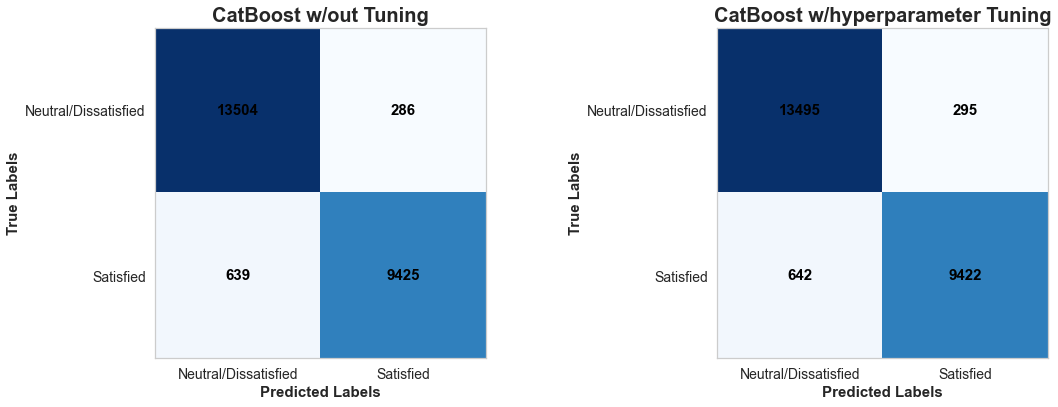

In [956]:
# create a figure with two columns and one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_cbv, cmap='Blues')
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('CatBoost w/out Tuning', fontweight='bold', fontsize='20')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_cbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# plot second confusion matrix
cm_cbrs = confusion_matrix(y_test, y_pred_cbc_test_best)
axs[1].imshow(cm_cbrs, cmap='Blues')
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[1].set_title('CatBoost w/hyperparameter Tuning', fontweight='bold', fontsize='20')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_cbrs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

plt.show()

#### Confusion Matrix Results:
- Compared to the model without tuning, the model with random search performed slightly better in terms of a higher true negative rate, and a lower false positive rate. 
- Both models performed very well. 

### CatBoost (No Tuning) Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>96%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### CatBoost With RandomSearchCV Results:
- **<mark>Test Data</mark> F1-Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> F1-Score For Neutral/Dissatisfied Class**: <mark>96%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

## Best Model: CatBoost w/out Tuning
- I have chosen catboost w/tuning as the best performing model for these reasons:
    - It is designed to work well with a dataset that has a lot of categorical data.
    - It was accurate on training and test data. 
    - Evaluation metrics are equally as good as the model that used random search hyperparameters.
    - It performs the best in terms of predicting true negatives.
    - Has lower false negative and false positive rates. 
    - Performs the best at predicting true positives.
    - Less computationally expensive than a model that uses grid search or random search. 
    
### CatBoost Results:
- Test Data **Precision Score** For Satisfied Class: <mark>97%</mark> 
- Test Data **Recall Score** For Satisfied Class: <mark>94%</mark> 
- Test Data **F1 Score** For Satisfied Class: <mark>95%</mark> 
- Test Data **Precision Score** For Neutral/Dissatisfied Class: <mark>95%</mark> 
- Test Data **Recall Score** For Neutral/Dissatisfied Class: <mark>98%</mark> 
- Test Data **F1 Score** For Neutral/Dissatisfied Class: <mark>97%</mark>
- **ROC AUC Score**: <mark>96%</mark>

### CatBoost Feature Importance:
- Below is a print out of the column names before they were encoded, and after. 
- The columns that were categorical but ordinal were labeled as such. 

In [957]:
# Print the column order after each step of the pipeline
print('Original column order:', X_train.columns)
print('\n')
print('Column order after encoding:', encoded_cols)
print('\n')
# Print the column order after scaling
print('Column order after scaling:', all_cols)

Original column order: Index(['gender', 'customer_type', 'type_of_travel', 'class', 'flight_distance',
       'inflight_wifi_service', 'ease_of_online_booking', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on-board_service', 'leg_room', 'baggage_handling', 'checkin_service',
       'inflight_service', 'cleanliness'],
      dtype='object')


Column order after encoding: ['gender_Female', 'gender_Male', 'customer_type_First-time Customer', 'customer_type_Returning Customer', 'type_of_travel_Business travel', 'type_of_travel_Personal Travel', 'class_Business', 'class_Eco', 'class_Eco Plus', 'ordinal_encoder__x0', 'ordinal_encoder__x1', 'ordinal_encoder__x2', 'ordinal_encoder__x3', 'ordinal_encoder__x4', 'ordinal_encoder__x5', 'ordinal_encoder__x6', 'ordinal_encoder__x7', 'ordinal_encoder__x8', 'ordinal_encoder__x9', 'ordinal_encoder__x10', 'ordinal_encoder__x11']


Column order after scaling: ['gender_Female', 'gender_Male', 'customer_type_

- In the list of feature importance, the features that had their names changed to ordinal_encoder__X# are match up with the original column order with their respective index number.  
- For example, 'inflight_wifi_service' would be 'ordinal_encoder__x0' and 'ease_of_online_booking' would be 'ordinal_encoder__x1'. 

In [958]:
# Display feature importance in descending order
print('\nFeature Importance:')
for feat, importance in sorted(zip(encoded_cols, feat_importance), key=lambda x: x[1], reverse=True):
    print(feat, importance)


Feature Importance:
gender_Female 17.544212754808957
ordinal_encoder__x8 15.92774464045291
ordinal_encoder__x7 9.566777522189142
customer_type_Returning Customer 9.533820620755627
ordinal_encoder__x9 5.340256741536137
type_of_travel_Personal Travel 5.0244156166491685
ordinal_encoder__x0 4.278367250778637
class_Eco Plus 4.131239826537129
type_of_travel_Business travel 3.8606412340096226
ordinal_encoder__x5 3.7549645340677733
ordinal_encoder__x1 3.3988563067878004
ordinal_encoder__x6 2.84598981364385
gender_Male 2.695351292774978
ordinal_encoder__x2 2.5606560350821357
class_Business 2.416062943360795
class_Eco 2.0235649891173653
ordinal_encoder__x10 0.7485643682937635
customer_type_First-time Customer 0.7483474792116455
ordinal_encoder__x11 0.26124876479060904
ordinal_encoder__x3 0.15595490559796657
ordinal_encoder__x4 0.008356988376771651


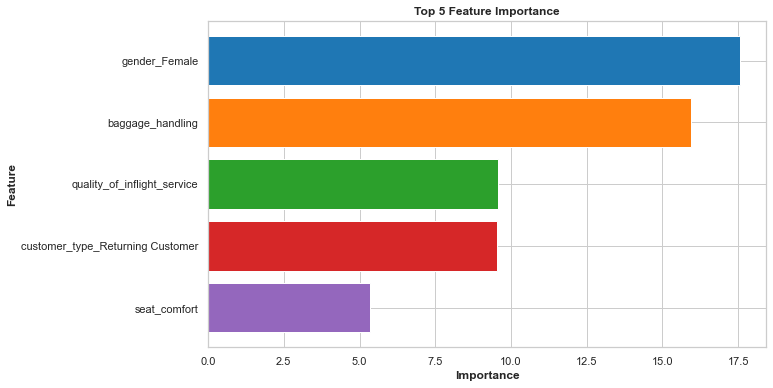

In [959]:
# Define colors for each bar
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Rename feature labels
feat_labels = {'ordinal_encoder__x8': 'baggage_handling', 
               'ordinal_encoder__x7': 'quality_of_inflight_service',
               'ordinal_encoder__x9': 'seat_comfort'}

# Extract top 5 feature importance and labels
top_feats = sorted(zip(encoded_cols, feat_importance), key=lambda x: x[1], reverse=True)[:5]
labels = [feat_labels.get(feat, feat) for feat, _ in top_feats]
importances = [imp for _, imp in top_feats]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10,6))
y_pos = range(len(labels))
ax.barh(y_pos, importances, color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Importance', fontweight='bold')
ax.set_ylabel('Feature', fontweight='bold')
ax.set_title('Top 5 Feature Importance', fontweight='bold')

plt.savefig('images/feature_importance.png', format='png')

plt.show()


#### Top Five Important Features Results: 
- **Gender_Female**: The most important feature in the model is gender, specifically whether the passenger is female. 
    - This suggests that gender may play a significant role in predicting customer satisfaction in the airline industry.
- **Baggage_handling** (ordinal_encoder__x8): Passengers who experience delays or other issues with baggage handling are more likely to rate their travel experience as neutral/dissatisfied. 
    - From experience, this is a very important factor for travelers. No one wants to be without their luggage while on a trip. 
- **Inflight_service** (ordinal_encoder__x7): The third most important feature is represented by ordinal_encoder__x7, which corresponds to the inflight service rating. 
    - This suggests that the quality of inflight service is an important factor in determining customer satisfaction.
    - Many things fall under the umbrella of inflight service such as:
        - Beverages
        - Snacks
        - Attentive flight crew
        - Updates from the flight crew
- **Customer_type_Returning Customer**: The fourth most important feature is whether the passenger is a returning customer. 
    - This suggests that customer loyalty is an important factor in determining customer satisfaction.
    - The company needs to reward their loyalty members with more perks. 
- **Seat_comfort** (ordinal_encoder__x9): The fifth most important feature is represented by ordinal_encoder__x9, which corresponds to the seat comfort rating. 
    - This suggests that the quality of seating comfort is an important factor in determining customer satisfaction.
    - Flights post COVID-19 are jam packed, making travel less comfortable. 
    - When seats are worn out, they should be replaced immediately. 

## Conclusion
---
- Although all passengers are important, female passengers seem to be more impactful than passengers that are male. Managers need to ensure that their staff are ensuring the same service to men and women equally. 
    - I recommend further investigation to determine if there are specific areas where female passengers have unique concerns or needs, and address them. 
    - I recommend new marketing campaigns directed toward female passengers.  
- Baggage handling is an issue that all travelers have in the back of their mind while they travel, and should be addressed by all station managers. 
    - I recommend possibly investing in baggage tracking system.
    - Also, more training for baggage handling staff to ensure that luggage is handled with care and efficiently delivered to customers. 
- Focusing on improving the quality of inflight services for passengers could not only lead to higher levels of satisfaction among passengers but also help to build brand loyalty and encourage repeat business.
    - From experience working in the service industry before, having happy customers makes the service staff's job much easier and much more enjoyable. 
    - I recommend increasing the number of flights to help reduce the number of oversold flights. 
    - Create a more extensive training program for flight attendants, making it more selective. 
- Loyal mileage card members need to be rewarded more for their repeated business. 
    - I recommend creating a better reward program for the passengers that possess mileage cards. 
        - Each year more bonus miles should be deposited in these card member's accounts. 
- Lastly, the seats aboard aircrafts should be tested every day. 
    - If a seat doesn't pass a "comfort" test, then they should be replaced immediately. 

## Future Work
- There is always an improvement when working with machine learning. With more recent data and more time for tuning and using other models, I am confident the model performance can be improved. 
- After some changes or improvements have been made to the business model, re-analyze new survey data to see if customer's satisfaction levels have changed.